# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(ggrepel))
library(svglite)
library(RColorBrewer)
library(scales)



[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

In [2]:
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))

# Read in merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds

In [3]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [4]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds")

adata

An object of class Seurat 
666999 features across 26185 samples within 4 assays 
Active assay: ATAC (563210 features, 563210 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [5]:
summary(adata@meta.data$Construction_annotation)

levels_contruction_annotation<-levels(adata@meta.data$Construction_annotation)

levels_contruction_annotation

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                         927 
            early erythroid               mid erythroid 
                        374                          11 
             late erythroid                    early MK 
                        832                         130 
                         MK         Classical monocytes 
                       4152                         554 
                 Mast cells  Double-negative thymocytes 
                       1168                         701 
        gamma-delta T cells                        ILC3 
                        412                        3391 
         Regulatory T cells Tem/Effector helper T cells 
                        289                         284 
     Type 17 helper T cells              CD16- NK cells 
                        730                        2892 
                   NK cells                Plasmablasts 
                       1284                         237 
                 unassigned 
                       1372

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

In [6]:
summary(adata@meta.data$orig.ident)

levels_orig.ident<-levels(adata@meta.data$orig.ident)

levels_orig.ident

MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100

[1] "MCO_01326" "MCO_01327" "MCO_01328" "MCO_01329" "MCO_01330" "MCO_01331"
[7] "MCO_01332" "MCO_01333"

### Graphs of Cell Typist annotation

In [7]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/",'CellTypist_annotation_graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

In [8]:
sparring<-adata

## Barplot Construction_annotation with numbers

In [9]:
met<-sparring[[]]

In [10]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"

In [11]:
met.dt<-data.table(met,key=c("seurat_clusters","Construction_annotation",'orig.ident'))

In [12]:
#str(met.dt)

In [13]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [14]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [15]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [16]:
str(Freq.table)

'data.frame':	274 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 10 10 10 10 10 10 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 6 3 3 3 3 3 3 ...
 $ Construction_annotation: Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 9 9 9 9 7 21 5 10 18 11 ...
 $ Freq                   : int  29 3842 48 2 2 2 1 4 1 31 ...
 $ TOTAL                  : int  29 3842 48 2 41 41 41 41 41 41 ...
 $ Perc                   : num  100 100 100 100 4.88 ...


In [17]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    93.0   500.0   892.8  1692.2  3871.0 

In [18]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [19]:
str(Freq.table_CT_annotation)

'data.frame':	21 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  3886 2404 155 927 374 11 832 130 4152 554 ...


In [20]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	8 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 1 2 3 4 5 6 7 8
 $ nTime     : int  3871 225 2715 5251 3218 5042 1763 4100


In [21]:
str(Freq.table_CT_annotation)

'data.frame':	21 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  3886 2404 155 927 374 11 832 130 4152 554 ...


## Merges to get total numbers

In [22]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	274 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 18 18 18 18 18 18 18 18 18 18 ...
 $ seurat_clusters             : Factor w/ 15 levels "1","2","3","4",..: 10 11 11 10 4 7 10 11 14 14 ...
 $ orig.ident                  : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 3 4 4 4 6 3 6 5 4 ...
 $ Freq                        : int  1 8 34 19 4 413 1 2 6 50 ...
 $ TOTAL                       : int  7 76 225 955 93 1823 41 11 15 135 ...
 $ Perc                        : num  14.29 10.53 15.11 1.99 4.3 ...
 $ Freq_Construction_annotation: int  2892 2892 2892 2892 2892 2892 2892 2892 2892 2892 ...


In [23]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	274 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 1 2 2 2 2 2 2 2 2 2 ...
 $ Construction_annotation     : Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 1 21 4 4 7 7 2 12 14 21 ...
 $ seurat_clusters             : Factor w/ 15 levels "1","2","3","4",..: 2 4 4 11 11 4 8 11 4 11 ...
 $ Freq                        : int  3871 18 58 2 4 30 12 1 1 1 ...
 $ TOTAL                       : int  3871 112 112 8 8 112 12 8 112 8 ...
 $ Perc                        : num  100 16.1 51.8 25 50 ...
 $ Freq_Construction_annotation: int  3886 1372 927 927 832 832 2404 701 3391 1372 ...
 $ nTime                       : int  3871 225 225 225 225 225 225 225 225 225 ...


### Filter x axis by frequency

In [24]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 1),]


str(Freq.table_filtered)

'data.frame':	274 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 1 2 2 2 2 2 2 2 2 2 ...
 $ Construction_annotation     : Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 1 21 4 4 7 7 2 12 14 21 ...
 $ seurat_clusters             : Factor w/ 15 levels "1","2","3","4",..: 2 4 4 11 11 4 8 11 4 11 ...
 $ Freq                        : int  3871 18 58 2 4 30 12 1 1 1 ...
 $ TOTAL                       : int  3871 112 112 8 8 112 12 8 112 8 ...
 $ Perc                        : num  100 16.1 51.8 25 50 ...
 $ Freq_Construction_annotation: int  3886 1372 927 927 832 832 2404 701 3391 1372 ...
 $ nTime                       : int  3871 225 225 225 225 225 225 225 225 225 ...


In [25]:
library(scales)

In [26]:
vector_colors_Construction_annotation<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


N_NEEDED<-length(levels_contruction_annotation)

base_colors <- RColorBrewer::brewer.pal(12, "Set3") 
#custom_palette <- colorRampPalette(base_colors)(N_NEEDED)
custom_palette <- palette.colors(n = N_NEEDED, palette = "Polychrome 36")
#custom_palette <- hcl.colors(N_NEEDED, palette = "Spectral")
custom_palette

darkpurplishgray       purplishwhite            vividred         vividpurple 
          "#5A5156"           "#E4E1E3"           "#F6222E"           "#FE00FA" 
vividyellowishgreen  strongpurplishblue   vividorangeyellow    vividpurplishred 
          "#16FF32"           "#3283FE"           "#FEAF16"           "#B00068" 
     brilliantgreen    vividyellowgreen           vividblue     brilliantpurple 
          "#1CFFCE"           "#90AD1C"           "#2ED9FF"           "#DEA0FD" 
        vividviolet          strongpink          strongblue strongreddishorange 
          "#AA0DFE"           "#F8A19F"           "#325A9B"           "#C4451C" 
         vividgreen     lightolivebrown  vividreddishpurple vividgreenishyellow 
          "#1C8356"           "#85660D"           "#B10DA1"           "#FBE426" 
vividyellowishgreen 
          "#1CBE4F"

In [27]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [28]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(seurat_clusters," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


In [29]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Construction_annotation_vs_cluster_FINAL",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

# Subclustering

In [30]:
# This extracts the number of columns (dimensions) in your WNN reduction
ncol(sparring[["umap.wnn"]]@cell.embeddings)

[1] 2

## Graphs of Cell Typist annotation subclustering

In [31]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/",'CellTypist_annotation_graphs','/','Subclusters','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

## Subclusters_5 HERE 

In [32]:
sparring<-adata

In [33]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 5)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [34]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster5_snn", "sub_cluster5_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [35]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster5_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2934
Number of edges: 27753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7416
Number of communities: 54
Elapsed time: 0 seconds


In [36]:
#table(adata_sub$seurat_clusters)

In [37]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_5']] <- factor(unassigned_vector, levels = new_levels)

In [38]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_5']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [40]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_5)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("5_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_5) <- renamed_levels

In [41]:
summary(sparring@meta.data$Subclusters_5)

Not_in_scope          5_0          5_1          5_2          5_3          5_4 
       23251           87           85           78           78           75 
         5_5          5_6          5_7          5_8          5_9         5_10 
          73           70           69           69           68           66 
        5_11         5_12         5_13         5_14         5_15         5_16 
          65           64           64           63           62           61 
        5_17         5_18         5_19         5_20         5_21         5_22 
          61           60           60           60           58           58 
        5_23         5_24         5_25         5_26         5_27         5_28 
          57           57           57           56           55           54 
        5_29         5_30         5_31         5_32         5_33         5_34 
          54           53           51           50           48           48 
        5_35         5_36         5_37         5_38         5_39         5_40 
          47           47           47           46           46           45 
        5_41         5_42         5_43         5_44         5_45         5_46 
          42           41           40           39           39           37 
        5_47         5_48         5_49         5_50         5_51         5_52 
          36           35           35           34           31           29 
        5_53 
          24

### Stacked Barplot Construction_annotation with numbers

In [42]:
met<-sparring[[]]

In [43]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_5"

In [44]:
met<-droplevels(met[-which(met$Subclusters_5 == 'Not_in_scope'),])

#str(met)

In [45]:
met.dt<-data.table(met,key=c("Subclusters_5","Construction_annotation",'orig.ident'))

In [46]:
#str(met.dt)

In [47]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [48]:
met.dt<-data.table(met, key=c("Subclusters_5",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [49]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_5",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [50]:
str(Freq.table)

'data.frame':	747 obs. of  6 variables:
 $ Subclusters_5          : Factor w/ 54 levels "5_0","5_1","5_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 2 2 2 2 2 2 3 3 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 5 4 10 8 11 9 12 15 10 11 ...
 $ Freq                   : int  1 3 1 31 9 3 11 1 4 5 ...
 $ TOTAL                  : int  1 59 59 59 59 59 59 59 27 27 ...
 $ Perc                   : num  100 5.08 1.69 52.54 15.25 ...


In [51]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   15.00   27.00   27.09   36.00   64.00 

In [52]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [53]:
str(Freq.table_CT_annotation)

'data.frame':	15 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  5 1 25 58 21 51 35 1232 60 216 ...


In [54]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	3 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3
 $ nTime     : int  802 1300 832


In [55]:
str(Freq.table_CT_annotation)

'data.frame':	15 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  5 1 25 58 21 51 35 1232 60 216 ...


### Merges to get total numbers

In [56]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	747 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Subclusters_5               : Factor w/ 54 levels "5_0","5_1","5_2",..: 22 41 20 29 31 13 4 37 14 46 ...
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 3 2 3 2 2 1 3 2 2 1 ...
 $ Freq                        : int  3 2 8 1 4 5 5 4 9 1 ...
 $ TOTAL                       : int  18 9 23 3 35 35 42 22 40 2 ...
 $ Perc                        : num  16.7 22.2 34.8 33.3 11.4 ...
 $ Freq_Construction_annotation: int  608 608 608 608 608 608 608 608 608 608 ...


In [57]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	747 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 12 5 4 12 12 12 12 12 7 8 ...
 $ Subclusters_5               : Factor w/ 54 levels "5_0","5_1","5_2",..: 10 54 29 7 13 24 49 40 24 14 ...
 $ Freq                        : int  11 1 1 3 5 8 7 1 2 1 ...
 $ TOTAL                       : int  33 24 51 10 35 54 33 3 54 2 ...
 $ Perc                        : num  33.33 4.17 1.96 30 14.29 ...
 $ Freq_Construction_annotation: int  608 21 58 608 608 608 608 608 35 1232 ...
 $ nTime                       : int  802 802 802 802 802 802 802 802 802 802 ...


### Filter x axis by frequency

In [58]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	747 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 12 5 4 12 12 12 12 12 7 8 ...
 $ Subclusters_5               : Factor w/ 54 levels "5_0","5_1","5_2",..: 10 54 29 7 13 24 49 40 24 14 ...
 $ Freq                        : int  11 1 1 3 5 8 7 1 2 1 ...
 $ TOTAL                       : int  33 24 51 10 35 54 33 3 54 2 ...
 $ Perc                        : num  33.33 4.17 1.96 30 14.29 ...
 $ Freq_Construction_annotation: int  608 21 58 608 608 608 608 608 35 1232 ...
 $ nTime                       : int  802 802 802 802 802 802 802 802 802 802 ...


In [60]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [61]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_5," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_5)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_5 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [62]:
setwd(path_graphs)

svgname<-paste("Subclusters_5",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_5

In [63]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_5','orig.ident'))

In [66]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	138 obs. of  8 variables:
 $ Subclusters_5               : Factor w/ 54 levels "5_0","5_1","5_2",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3 1 2 3 1 2 3 2 ...
 $ MJ_annotation               : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 5 8 12 15 8 8 12 8 8 8 ...
 $ Freq                        : int  1 31 9 2 14 23 1 27 10 17 ...
 $ TOTAL                       : int  1 59 27 4 35 46 2 51 25 36 ...
 $ Perc                        : num  100 52.5 33.3 50 40 ...
 $ Freq_Construction_annotation: int  21 1232 608 144 1232 1232 608 1232 1232 1232 ...
 $ nTime                       : int  802 1300 832 802 1300 832 802 1300 832 1300 ...


In [67]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_5, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_5 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_5, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	138 obs. of  3 variables:
 $ orig.ident   : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3 1 2 3 1 2 3 2 ...
 $ Subclusters_5: Factor w/ 54 levels "5_0","5_1","5_2",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ MJ_annotation: Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 5 8 12 15 8 8 12 8 8 8 ...


In [68]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_5 = as.character(Subclusters_5)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_5 = as.character(Subclusters_5)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_5, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_5")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [69]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_5<-factor(sparring@meta.data$Subclusters_5, levels=renamed_levels, ordered=TRUE)



In [70]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_5, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                        MEP               mid erythroid 
                          0                           0 
             late erythroid         Classical monocytes 
                          0                           0 
                 Mast cells  Double-negative thymocytes 
                          1                           0 
        gamma-delta T cells                        ILC3 
                          0                        2466 
         Regulatory T cells Tem/Effector helper T cells 
                          0                          30 
     Type 17 helper T cells              CD16- NK cells 
                        116                         304 
                   NK cells                Plasmablasts 
                          1                           2 
                 unassigned                        <NA> 
                         14                       23251 


Not_in_scope          5_0          5_1          5_2          5_3          5_4 
       23251           87           85           78           78           75 
         5_5          5_6          5_7          5_8          5_9         5_10 
          73           70           69           69           68           66 
        5_11         5_12         5_13         5_14         5_15         5_16 
          65           64           64           63           62           61 
        5_17         5_18         5_19         5_20         5_21         5_22 
          61           60           60           60           58           58 
        5_23         5_24         5_25         5_26         5_27         5_28 
          57           57           57           56           55           54 
        5_29         5_30         5_31         5_32         5_33         5_34 
          54           53           51           50           48           48 
        5_35         5_36         5_37         5_38


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_5

In [71]:
met<-sparring[[]]

In [72]:
#colnames(met)

In [73]:
met<-droplevels(met[-which(met$Subclusters_5 == 'Not_in_scope'),])

#str(met)

In [74]:
met.dt<-data.table(met,key=c("Subclusters_5","MJ_annotation",'orig.ident'))

In [75]:
#str(met.dt)

In [76]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [77]:
met.dt<-data.table(met, key=c("Subclusters_5",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [78]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_5",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [79]:
str(Freq.table)

'data.frame':	138 obs. of  6 variables:
 $ Subclusters_5: Ord.factor w/ 54 levels "5_0"<"5_1"<"5_2"<..: 1 1 1 2 2 2 11 11 11 12 ...
 $ orig.ident   : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3 1 2 3 1 2 3 1 ...
 $ MJ_annotation: Ord.factor w/ 8 levels "Mast cells"<"ILC3"<..: 1 2 5 8 2 2 2 2 2 2 ...
 $ Freq         : int  1 59 27 4 35 46 22 36 8 21 ...
 $ TOTAL        : int  1 59 27 4 35 46 22 36 8 21 ...
 $ Perc         : num  100 100 100 100 100 100 100 100 100 100 ...


In [80]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   21.00   21.26   33.00   64.00 

In [81]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [82]:
str(Freq.table_CT_annotation)

'data.frame':	8 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 8 levels "Mast cells"<"ILC3"<..: 1 2 3 4 5 6 7 8
 $ Freq_MJ_annotation: int  1 2466 30 116 304 1 2 14


In [83]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	3 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3
 $ nTime     : int  802 1300 832


In [84]:
str(Freq.table_CT_annotation)

'data.frame':	8 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 8 levels "Mast cells"<"ILC3"<..: 1 2 3 4 5 6 7 8
 $ Freq_MJ_annotation: int  1 2466 30 116 304 1 2 14


### Merges to get total numbers

In [85]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	138 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 8 levels "Mast cells"<"ILC3"<..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Subclusters_5     : Ord.factor w/ 54 levels "5_0"<"5_1"<"5_2"<..: 39 31 54 20 3 9 32 1 26 23 ...
 $ orig.ident        : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 3 3 1 1 1 2 1 3 3 3 ...
 $ Freq              : int  20 9 24 1 2 9 1 27 27 24 ...
 $ TOTAL             : int  20 9 24 1 2 9 1 27 27 24 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  304 304 304 304 304 304 304 304 304 304 ...


In [86]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	138 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 8 levels "Mast cells"<"ILC3"<..: 2 2 5 2 2 5 2 5 2 2 ...
 $ Subclusters_5     : Ord.factor w/ 54 levels "5_0"<"5_1"<"5_2"<..: 13 12 54 34 16 32 50 3 31 48 ...
 $ Freq              : int  35 21 24 38 13 1 15 2 9 35 ...
 $ TOTAL             : int  35 21 24 38 13 1 15 2 9 35 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  2466 2466 304 2466 2466 304 2466 304 2466 2466 ...
 $ nTime             : int  802 802 802 802 802 802 802 802 802 802 ...


### Filter x axis by frequency

In [87]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	138 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 8 levels "Mast cells"<"ILC3"<..: 2 2 5 2 2 5 2 5 2 2 ...
 $ Subclusters_5     : Ord.factor w/ 54 levels "5_0"<"5_1"<"5_2"<..: 13 12 54 34 16 32 50 3 31 48 ...
 $ Freq              : int  35 21 24 38 13 1 15 2 9 35 ...
 $ TOTAL             : int  35 21 24 38 13 1 15 2 9 35 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  2466 2466 304 2466 2466 304 2466 304 2466 2466 ...
 $ nTime             : int  802 802 802 802 802 802 802 802 802 802 ...


In [89]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [90]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_5," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_5)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_5 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [91]:
setwd(path_graphs)

svgname<-paste("Subclusters_5_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [92]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                         927 
            early erythroid               mid erythroid 
                        374                          11 
             late erythroid                    early MK 
                        832                         130 
                         MK         Classical monocytes 
                       4152                         554 
                 Mast cells  Double-negative thymocytes 
                       1168                         701 
        gamma-delta T cells                        ILC3 
                        412                        3391 
         Regulatory T cells Tem/Effector helper T cells 
                        289                         284 
     Type 17 helper T cells              CD16- NK cells 
                        730                        2892 
                   NK cells                Plasmablasts 
                       1284                         237 
                 unassigned 
                       1372

In [93]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [94]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 5

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int [1:2934] 15282 15284 15293 15300 15301 15304 15305 15308 15325 15339 ...


In [95]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [96]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                         922 
            early erythroid               mid erythroid 
                        374                          10 
             late erythroid                    early MK 
                        807                         130 
                         MK         Classical monocytes 
                       4152                         496 
                 Mast cells  Double-negative thymocytes 
                       1148                         650 
        gamma-delta T cells                        ILC3 
                        377                        4625 
         Regulatory T cells Tem/Effector helper T cells 
                        229                          98 
     Type 17 helper T cells              CD16- NK cells 
                        440                        2588 
                   NK cells                Plasmablasts 
                       1215                         237 
                 unassigned 
                       1242

## Subclusters_4 HERE 

In [97]:
sparring<-adata

In [98]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 4)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [99]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster4_snn", "sub_cluster4_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [100]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster4_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2953
Number of edges: 28105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7494
Number of communities: 55
Elapsed time: 0 seconds


In [101]:
#table(adata_sub$seurat_clusters)

In [102]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_4']] <- factor(unassigned_vector, levels = new_levels)

In [103]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_4']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [104]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_4)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("4_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_4) <- renamed_levels

In [105]:
summary(sparring@meta.data$Subclusters_4)

Not_in_scope          4_0          4_1          4_2          4_3          4_4 
       23232           90           84           81           80           78 
         4_5          4_6          4_7          4_8          4_9         4_10 
          74           74           71           71           71           69 
        4_11         4_12         4_13         4_14         4_15         4_16 
          68           68           66           65           65           63 
        4_17         4_18         4_19         4_20         4_21         4_22 
          62           60           59           56           54           53 
        4_23         4_24         4_25         4_26         4_27         4_28 
          53           53           53           52           52           52 
        4_29         4_30         4_31         4_32         4_33         4_34 
          52           52           51           51           50           49 
        4_35         4_36         4_37         4_38         4_39         4_40 
          49           49           48           48           46           45 
        4_41         4_42         4_43         4_44         4_45         4_46 
          44           44           41           39           36           36 
        4_47         4_48         4_49         4_50         4_51         4_52 
          36           32           29           28           28           27 
        4_53         4_54 
          23           23

### Stacked Barplot Construction_annotation with numbers

In [106]:
met<-sparring[[]]

In [107]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_4"

In [108]:
met<-droplevels(met[-which(met$Subclusters_4 == 'Not_in_scope'),])

#str(met)

In [109]:
met.dt<-data.table(met,key=c("Subclusters_4","Construction_annotation",'orig.ident'))

In [110]:
#str(met.dt)

In [111]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [112]:
met.dt<-data.table(met, key=c("Subclusters_4",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [113]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_4",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [114]:
str(Freq.table)

'data.frame':	625 obs. of  6 variables:
 $ Subclusters_4          : Factor w/ 55 levels "4_0","4_1","4_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Construction_annotation: Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 2 4 5 6 7 9 11 12 15 ...
 $ Freq                   : int  16 3 20 8 5 5 1 5 1 6 ...
 $ TOTAL                  : int  90 90 90 90 90 90 90 90 90 90 ...
 $ Perc                   : num  17.78 3.33 22.22 8.89 5.56 ...


In [115]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    21.0    45.0    39.2    51.0    90.0 

In [116]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [117]:
str(Freq.table_CT_annotation)

'data.frame':	18 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  719 369 4 470 110 186 222 47 16 1 ...


In [118]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	4 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 1 2 3 4
 $ nTime     : int  112 2566 93 182


In [119]:
str(Freq.table_CT_annotation)

'data.frame':	18 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  719 369 4 470 110 186 222 47 16 1 ...


### Merges to get total numbers

In [120]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	625 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Subclusters_4               : Factor w/ 55 levels "4_0","4_1","4_2",..: 16 43 2 38 17 30 23 48 35 55 ...
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 2 2 4 2 2 3 2 4 2 2 ...
 $ Freq                        : int  9 4 1 2 4 1 1 1 1 2 ...
 $ TOTAL                       : int  63 44 16 45 42 1 50 14 49 21 ...
 $ Perc                        : num  14.29 9.09 6.25 4.44 9.52 ...
 $ Freq_Construction_annotation: int  100 100 100 100 100 100 100 100 100 100 ...


In [121]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	625 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 4 5 18 4 4 1 1 1 4 ...
 $ Subclusters_4               : Factor w/ 55 levels "4_0","4_1","4_2",..: 18 42 18 18 21 19 45 37 15 18 ...
 $ Freq                        : int  13 1 1 5 1 2 2 7 3 4 ...
 $ TOTAL                       : int  23 1 23 23 5 4 4 17 6 23 ...
 $ Perc                        : num  56.52 100 4.35 21.74 20 ...
 $ Freq_Construction_annotation: int  719 470 110 505 470 470 719 719 719 470 ...
 $ nTime                       : int  112 112 112 112 112 112 112 112 112 112 ...


### Filter x axis by frequency

In [122]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	625 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 4 5 18 4 4 1 1 1 4 ...
 $ Subclusters_4               : Factor w/ 55 levels "4_0","4_1","4_2",..: 18 42 18 18 21 19 45 37 15 18 ...
 $ Freq                        : int  13 1 1 5 1 2 2 7 3 4 ...
 $ TOTAL                       : int  23 1 23 23 5 4 4 17 6 23 ...
 $ Perc                        : num  56.52 100 4.35 21.74 20 ...
 $ Freq_Construction_annotation: int  719 470 110 505 470 470 719 719 719 470 ...
 $ nTime                       : int  112 112 112 112 112 112 112 112 112 112 ...


In [123]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [124]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_4," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_4)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_4 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [125]:
setwd(path_graphs)

svgname<-paste("Subclusters_4",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_4

In [126]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_4','orig.ident'))

In [127]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	127 obs. of  8 variables:
 $ Subclusters_4               : Factor w/ 55 levels "4_0","4_1","4_2",..: 1 2 2 3 3 3 4 4 4 5 ...
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 2 2 4 2 3 4 2 3 4 1 ...
 $ MJ_annotation               : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 4 6 4 1 1 6 4 11 17 4 ...
 $ Freq                        : int  20 19 6 3 1 27 19 1 1 1 ...
 $ TOTAL                       : int  90 68 16 7 2 72 76 1 3 1 ...
 $ Perc                        : num  22.2 27.9 37.5 42.9 50 ...
 $ Freq_Construction_annotation: int  470 186 470 719 719 186 470 113 58 470 ...
 $ nTime                       : int  2566 2566 182 2566 93 182 2566 93 182 112 ...


In [128]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_4, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_4 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_4, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	127 obs. of  3 variables:
 $ orig.ident   : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 2 2 4 2 3 4 2 3 4 1 ...
 $ Subclusters_4: Factor w/ 55 levels "4_0","4_1","4_2",..: 1 2 2 3 3 3 4 4 4 5 ...
 $ MJ_annotation: Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 4 6 4 1 1 6 4 11 17 4 ...


In [129]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_4 = as.character(Subclusters_4)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_4 = as.character(Subclusters_4)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_4, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_4")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [130]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_4<-factor(sparring@meta.data$Subclusters_4, levels=renamed_levels, ordered=TRUE)



In [131]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_4, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                        MEP             early erythroid 
                       1150                         582 
              mid erythroid              late erythroid 
                          0                         462 
                   early MK                          MK 
                         42                         302 
        Classical monocytes                  Mast cells 
                         57                          54 
 Double-negative thymocytes         gamma-delta T cells 
                          0                           0 
                       ILC3          Regulatory T cells 
                          4                           1 
Tem/Effector helper T cells      Type 17 helper T cells 
                          0                           0 
             CD16- NK cells                    NK cells 
                         53                           1 
               Plasmablasts                  unassigned 
                          6   


Not_in_scope          4_0          4_1          4_2          4_3          4_4 
       23232           90           84           81           80           78 
         4_5          4_6          4_7          4_8          4_9         4_10 
          74           74           71           71           71           69 
        4_11         4_12         4_13         4_14         4_15         4_16 
          68           68           66           65           65           63 
        4_17         4_18         4_19         4_20         4_21         4_22 
          62           60           59           56           54           53 
        4_23         4_24         4_25         4_26         4_27         4_28 
          53           53           53           52           52           52 
        4_29         4_30         4_31         4_32         4_33         4_34 
          52           52           51           51           50           49 
        4_35         4_36         4_37         4_38


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_4

In [132]:
met<-sparring[[]]

In [133]:
#colnames(met)

In [134]:
met<-droplevels(met[-which(met$Subclusters_4 == 'Not_in_scope'),])

#str(met)

In [135]:
met.dt<-data.table(met,key=c("Subclusters_4","MJ_annotation",'orig.ident'))

In [136]:
#str(met.dt)

In [137]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [138]:
met.dt<-data.table(met, key=c("Subclusters_4",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [139]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_4",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [140]:
str(Freq.table)

'data.frame':	127 obs. of  6 variables:
 $ Subclusters_4: Ord.factor w/ 55 levels "4_0"<"4_1"<"4_2"<..: 1 2 2 11 11 12 12 13 14 14 ...
 $ orig.ident   : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 2 2 4 1 2 2 3 2 1 2 ...
 $ MJ_annotation: Ord.factor w/ 13 levels "MEP"<"early erythroid"<..: 3 5 3 1 1 2 7 1 1 3 ...
 $ Freq         : int  90 68 16 4 65 67 1 68 11 50 ...
 $ TOTAL        : int  90 68 16 4 65 67 1 68 11 50 ...
 $ Perc         : num  100 100 100 100 100 100 100 100 100 100 ...


In [141]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00   10.00   23.25   47.50   90.00 

In [142]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [143]:
str(Freq.table_CT_annotation)

'data.frame':	13 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 13 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_MJ_annotation: int  1150 582 462 42 302 57 54 4 1 53 ...


In [144]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	4 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 1 2 3 4
 $ nTime     : int  112 2566 93 182


In [145]:
str(Freq.table_CT_annotation)

'data.frame':	13 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 13 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_MJ_annotation: int  1150 582 462 42 302 57 54 4 1 53 ...


### Merges to get total numbers

In [146]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	127 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 13 levels "MEP"<"early erythroid"<..: 10 10 10 10 10 10 6 6 6 6 ...
 $ Subclusters_4     : Ord.factor w/ 55 levels "4_0"<"4_1"<"4_2"<..: 34 30 25 29 30 32 31 55 42 20 ...
 $ orig.ident        : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 4 2 4 4 3 4 4 3 4 4 ...
 $ Freq              : int  1 48 1 1 1 1 2 2 28 1 ...
 $ TOTAL             : int  1 48 1 1 1 1 2 2 28 1 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  53 53 53 53 53 53 57 57 57 57 ...


In [147]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	127 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 13 levels "MEP"<"early erythroid"<..: 3 1 1 3 3 1 1 1 1 1 ...
 $ Subclusters_4     : Ord.factor w/ 55 levels "4_0"<"4_1"<"4_2"<..: 50 52 23 5 42 37 14 17 30 45 ...
 $ Freq              : int  3 4 3 1 1 17 11 10 2 4 ...
 $ TOTAL             : int  3 4 3 1 1 17 11 10 2 4 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  462 1150 1150 462 462 1150 1150 1150 1150 1150 ...
 $ nTime             : int  112 112 112 112 112 112 112 112 112 112 ...


### Filter x axis by frequency

In [148]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	127 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 4 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 13 levels "MEP"<"early erythroid"<..: 3 1 1 3 3 1 1 1 1 1 ...
 $ Subclusters_4     : Ord.factor w/ 55 levels "4_0"<"4_1"<"4_2"<..: 50 52 23 5 42 37 14 17 30 45 ...
 $ Freq              : int  3 4 3 1 1 17 11 10 2 4 ...
 $ TOTAL             : int  3 4 3 1 1 17 11 10 2 4 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  462 1150 1150 462 462 1150 1150 1150 1150 1150 ...
 $ nTime             : int  112 112 112 112 112 112 112 112 112 112 ...


In [149]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [150]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_4," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_4)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_4 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [151]:
setwd(path_graphs)

svgname<-paste("Subclusters_4_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [152]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                         922 
            early erythroid               mid erythroid 
                        374                          10 
             late erythroid                    early MK 
                        807                         130 
                         MK         Classical monocytes 
                       4152                         496 
                 Mast cells  Double-negative thymocytes 
                       1148                         650 
        gamma-delta T cells                        ILC3 
                        377                        4625 
         Regulatory T cells Tem/Effector helper T cells 
                        229                          98 
     Type 17 helper T cells              CD16- NK cells 
                        440                        2588 
                   NK cells                Plasmablasts 
                       1215                         237 
                 unassigned 
                       1242

In [153]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [154]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 4

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int [1:2953] 3872 3874 3875 3879 3880 3881 3882 3883 3891 3892 ...


In [155]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [156]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1353 
            early erythroid               mid erythroid 
                        587                           6 
             late erythroid                    early MK 
                        799                          62 
                         MK         Classical monocytes 
                       4268                         331 
                 Mast cells  Double-negative thymocytes 
                       1155                         634 
        gamma-delta T cells                        ILC3 
                        376                        4516 
         Regulatory T cells Tem/Effector helper T cells 
                        215                          96 
     Type 17 helper T cells              CD16- NK cells 
                        437                        2541 
                   NK cells                Plasmablasts 
                       1203                         185 
                 unassigned 
                        976

## Subclusters_6 HERE 

In [157]:
sparring<-adata

In [158]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 6)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [159]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster6_snn", "sub_cluster6_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [160]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster6_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2330
Number of edges: 22049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7273
Number of communities: 50
Elapsed time: 0 seconds


1 singletons identified. 49 final clusters.



In [161]:
#table(adata_sub$seurat_clusters)

In [162]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_6']] <- factor(unassigned_vector, levels = new_levels)

In [163]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_6']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [164]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_6)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("6_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_6) <- renamed_levels

In [165]:
summary(sparring@meta.data$Subclusters_6)

Not_in_scope          6_0          6_1          6_2          6_3          6_4 
       23855           71           68           67           67           65 
         6_5          6_6          6_7          6_8          6_9         6_10 
          63           61           60           60           60           58 
        6_11         6_12         6_13         6_14         6_15         6_16 
          57           57           56           55           55           54 
        6_17         6_18         6_19         6_20         6_21         6_22 
          52           53           50           49           49           48 
        6_23         6_24         6_25         6_26         6_27         6_28 
          46           46           45           44           44           44 
        6_29         6_30         6_31         6_32         6_33         6_34 
          44           44           43           43           42           41 
        6_35         6_36         6_37         6_38         6_39         6_40 
          40           37           36           36           36           35 
        6_41         6_42         6_43         6_44         6_45         6_46 
          34           34           32           31           31           31 
        6_47         6_48 
          30           26

### Stacked Barplot Construction_annotation with numbers

In [166]:
met<-sparring[[]]

In [167]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_6"

In [168]:
met<-droplevels(met[-which(met$Subclusters_6 == 'Not_in_scope'),])

#str(met)

In [169]:
met.dt<-data.table(met,key=c("Subclusters_6","Construction_annotation",'orig.ident'))

In [170]:
#str(met.dt)

In [171]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [172]:
met.dt<-data.table(met, key=c("Subclusters_6",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [173]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_6",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [174]:
str(Freq.table)

'data.frame':	480 obs. of  6 variables:
 $ Subclusters_6          : Factor w/ 49 levels "6_0","6_1","6_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 2 4 7 9 10 11 12 14 15 ...
 $ Freq                   : int  2 1 2 1 2 10 13 1 2 2 ...
 $ TOTAL                  : int  71 71 71 71 71 71 71 71 71 71 ...
 $ Perc                   : num  2.82 1.41 2.82 1.41 2.82 ...


In [175]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   33.00   42.00   41.53   55.00   71.00 

In [176]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [177]:
str(Freq.table_CT_annotation)

'data.frame':	18 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  27 1 2 48 1 1 26 6 44 181 ...


In [178]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	3 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3
 $ nTime     : int  2006 301 23


In [179]:
str(Freq.table_CT_annotation)

'data.frame':	18 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  27 1 2 48 1 1 26 6 44 181 ...


### Merges to get total numbers

In [180]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	480 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Subclusters_6               : Factor w/ 49 levels "6_0","6_1","6_2",..: 24 6 5 4 21 14 19 34 11 10 ...
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 2 1 1 1 2 1 1 1 ...
 $ Freq                        : int  10 31 30 10 29 17 10 5 1 1 ...
 $ TOTAL                       : int  41 63 59 16 48 56 39 41 56 60 ...
 $ Perc                        : num  24.4 49.2 50.9 62.5 60.4 ...
 $ Freq_Construction_annotation: int  693 693 693 693 693 693 693 693 693 693 ...


In [181]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	480 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 15 15 10 15 15 15 10 15 15 15 ...
 $ Subclusters_6               : Factor w/ 49 levels "6_0","6_1","6_2",..: 24 6 37 4 21 14 14 34 11 10 ...
 $ Freq                        : int  10 31 7 10 29 17 4 5 1 1 ...
 $ TOTAL                       : int  41 63 37 16 48 56 56 41 56 60 ...
 $ Perc                        : num  24.4 49.2 18.9 62.5 60.4 ...
 $ Freq_Construction_annotation: int  693 693 181 693 693 693 181 693 693 693 ...
 $ nTime                       : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...


### Filter x axis by frequency

In [182]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	480 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 15 15 10 15 15 15 10 15 15 15 ...
 $ Subclusters_6               : Factor w/ 49 levels "6_0","6_1","6_2",..: 24 6 37 4 21 14 14 34 11 10 ...
 $ Freq                        : int  10 31 7 10 29 17 4 5 1 1 ...
 $ TOTAL                       : int  41 63 37 16 48 56 56 41 56 60 ...
 $ Perc                        : num  24.4 49.2 18.9 62.5 60.4 ...
 $ Freq_Construction_annotation: int  693 693 181 693 693 693 181 693 693 693 ...
 $ nTime                       : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...


In [183]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [184]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_6," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_6)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_6 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [185]:
setwd(path_graphs)

svgname<-paste("Subclusters_6",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_6

In [186]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_6','orig.ident'))

In [187]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	76 obs. of  8 variables:
 $ Subclusters_6               : Factor w/ 49 levels "6_0","6_1","6_2",..: 1 2 3 4 4 5 5 5 6 7 ...
 $ orig.ident                  : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 2 1 2 3 1 1 ...
 $ MJ_annotation               : Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 17 11 11 15 15 15 15 15 15 15 ...
 $ Freq                        : int  17 27 14 10 26 2 30 1 31 21 ...
 $ TOTAL                       : int  71 68 67 16 51 4 59 2 63 61 ...
 $ Perc                        : num  23.9 39.7 20.9 62.5 51 ...
 $ Freq_Construction_annotation: int  133 454 454 693 693 693 693 693 693 693 ...
 $ nTime                       : int  2006 2006 2006 2006 301 2006 301 23 2006 2006 ...


In [188]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_6, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_6 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_6, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	76 obs. of  3 variables:
 $ orig.ident   : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 2 1 2 3 1 1 ...
 $ Subclusters_6: Factor w/ 49 levels "6_0","6_1","6_2",..: 1 2 3 4 4 5 5 5 6 7 ...
 $ MJ_annotation: Ord.factor w/ 18 levels "MEP"<"early erythroid"<..: 17 11 11 15 15 15 15 15 15 15 ...


In [189]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_6 = as.character(Subclusters_6)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_6 = as.character(Subclusters_6)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_6, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_6")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [190]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_6<-factor(sparring@meta.data$Subclusters_6, levels=renamed_levels, ordered=TRUE)



In [191]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_6, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                        MEP             early erythroid 
                          0                           0 
              mid erythroid              late erythroid 
                          0                           1 
                   early MK                          MK 
                          0                           0 
        Classical monocytes                  Mast cells 
                          3                           0 
 Double-negative thymocytes         gamma-delta T cells 
                          1                          64 
                       ILC3          Regulatory T cells 
                        561                           0 
Tem/Effector helper T cells      Type 17 helper T cells 
                          0                           1 
             CD16- NK cells                    NK cells 
                       1160                         306 
               Plasmablasts                  unassigned 
                        203   


Not_in_scope          6_0          6_1          6_2          6_3          6_4 
       23855           71           68           67           67           65 
         6_5          6_6          6_7          6_8          6_9         6_10 
          63           61           60           60           60           58 
        6_11         6_12         6_13         6_14         6_15         6_16 
          57           57           56           55           55           54 
        6_17         6_18         6_19         6_20         6_21         6_22 
          52           53           50           49           49           48 
        6_23         6_24         6_25         6_26         6_27         6_28 
          46           46           45           44           44           44 
        6_29         6_30         6_31         6_32         6_33         6_34 
          44           44           43           43           42           41 
        6_35         6_36         6_37         6_38


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_6

In [192]:
met<-sparring[[]]

In [193]:
#colnames(met)

In [194]:
met<-droplevels(met[-which(met$Subclusters_6 == 'Not_in_scope'),])

#str(met)

In [195]:
met.dt<-data.table(met,key=c("Subclusters_6","MJ_annotation",'orig.ident'))

In [196]:
#str(met.dt)

In [197]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [198]:
met.dt<-data.table(met, key=c("Subclusters_6",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [199]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_6",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [200]:
str(Freq.table)

'data.frame':	76 obs. of  6 variables:
 $ Subclusters_6: Ord.factor w/ 49 levels "6_0"<"6_1"<"6_2"<..: 1 2 11 11 12 12 13 13 14 15 ...
 $ orig.ident   : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 2 1 2 1 2 1 1 ...
 $ MJ_annotation: Ord.factor w/ 10 levels "late erythroid"<..: 9 5 5 5 7 3 5 5 7 7 ...
 $ Freq         : int  71 68 56 2 56 1 55 2 56 55 ...
 $ TOTAL        : int  71 68 56 2 56 1 55 2 56 55 ...
 $ Perc         : num  100 100 100 100 100 100 100 100 100 100 ...


In [201]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    5.00   34.50   30.66   46.50   71.00 

In [202]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [203]:
str(Freq.table_CT_annotation)

'data.frame':	10 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 10 levels "late erythroid"<..: 1 2 3 4 5 6 7 8 9 10
 $ Freq_MJ_annotation: int  1 3 1 64 561 1 1160 306 203 30


In [204]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	3 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 2 3
 $ nTime     : int  2006 301 23


In [205]:
str(Freq.table_CT_annotation)

'data.frame':	10 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 10 levels "late erythroid"<..: 1 2 3 4 5 6 7 8 9 10
 $ Freq_MJ_annotation: int  1 3 1 64 561 1 1160 306 203 30


### Merges to get total numbers

In [206]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	76 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 10 levels "late erythroid"<..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Subclusters_6     : Ord.factor w/ 49 levels "6_0"<"6_1"<"6_2"<..: 20 19 12 15 26 39 20 22 31 27 ...
 $ orig.ident        : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 2 1 1 1 1 1 1 1 1 1 ...
 $ Freq              : int  8 13 56 55 45 36 42 4 44 44 ...
 $ TOTAL             : int  8 13 56 55 45 36 42 4 44 44 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  1160 1160 1160 1160 1160 1160 1160 1160 1160 1160 ...


In [207]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	76 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 10 levels "late erythroid"<..: 7 7 7 7 7 7 7 7 7 5 ...
 $ Subclusters_6     : Ord.factor w/ 49 levels "6_0"<"6_1"<"6_2"<..: 19 39 31 41 21 15 5 44 47 11 ...
 $ Freq              : int  13 36 44 35 48 55 4 32 31 56 ...
 $ TOTAL             : int  13 36 44 35 48 55 4 32 31 56 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  1160 1160 1160 1160 1160 1160 1160 1160 1160 561 ...
 $ nTime             : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...


### Filter x axis by frequency

In [208]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	76 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 3 levels "MCO_01331"<"MCO_01332"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 10 levels "late erythroid"<..: 7 7 7 7 7 7 7 7 7 5 ...
 $ Subclusters_6     : Ord.factor w/ 49 levels "6_0"<"6_1"<"6_2"<..: 19 39 31 41 21 15 5 44 47 11 ...
 $ Freq              : int  13 36 44 35 48 55 4 32 31 56 ...
 $ TOTAL             : int  13 36 44 35 48 55 4 32 31 56 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  1160 1160 1160 1160 1160 1160 1160 1160 1160 561 ...
 $ nTime             : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...


In [209]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [210]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_6," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_6)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_6 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [211]:
setwd(path_graphs)

svgname<-paste("Subclusters_6_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [212]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1353 
            early erythroid               mid erythroid 
                        587                           6 
             late erythroid                    early MK 
                        799                          62 
                         MK         Classical monocytes 
                       4268                         331 
                 Mast cells  Double-negative thymocytes 
                       1155                         634 
        gamma-delta T cells                        ILC3 
                        376                        4516 
         Regulatory T cells Tem/Effector helper T cells 
                        215                          96 
     Type 17 helper T cells              CD16- NK cells 
                        437                        2541 
                   NK cells                Plasmablasts 
                       1203                         185 
                 unassigned 
                        976

In [213]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [214]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 6

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int [1:2330] 15281 15285 15286 15287 15288 15291 15292 15296 15297 15298 ...


In [215]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [216]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1326 
            early erythroid               mid erythroid 
                        586                           4 
             late erythroid                    early MK 
                        752                          61 
                         MK         Classical monocytes 
                       4267                         308 
                 Mast cells  Double-negative thymocytes 
                       1149                         591 
        gamma-delta T cells                        ILC3 
                        259                        4623 
         Regulatory T cells Tem/Effector helper T cells 
                        174                          84 
     Type 17 helper T cells              CD16- NK cells 
                        362                        3008 
                   NK cells                Plasmablasts 
                       1096                         255 
                 unassigned 
                        835

## Subclusters_7 HERE 

In [217]:
sparring<-adata

In [218]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 7)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [219]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster7_snn", "sub_cluster7_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [220]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster7_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1823
Number of edges: 17285

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6972
Number of communities: 48
Elapsed time: 0 seconds


In [221]:
#table(adata_sub$seurat_clusters)

In [222]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_7']] <- factor(unassigned_vector, levels = new_levels)

In [223]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_7']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [224]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_7)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("7_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_7) <- renamed_levels

In [225]:
summary(sparring@meta.data$Subclusters_7)

Not_in_scope          7_0          7_1          7_2          7_3          7_4 
       24362           63           57           55           55           54 
         7_5          7_6          7_7          7_8          7_9         7_10 
          53           51           51           50           49           49 
        7_11         7_12         7_13         7_14         7_15         7_16 
          47           47           45           43           42           42 
        7_17         7_18         7_19         7_20         7_21         7_22 
          41           41           40           40           40           39 
        7_23         7_24         7_25         7_26         7_27         7_28 
          36           36           36           35           35           33 
        7_29         7_30         7_31         7_32         7_33         7_34 
          33           33           33           32           32           32 
        7_35         7_36         7_37         7_38         7_39         7_40 
          31           28           27           26           26           26 
        7_41         7_42         7_43         7_44         7_45         7_46 
          25           24           24           23           22           21 
        7_47 
          20

### Stacked Barplot Construction_annotation with numbers

In [226]:
met<-sparring[[]]

In [227]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_7"

In [228]:
met<-droplevels(met[-which(met$Subclusters_7 == 'Not_in_scope'),])

#str(met)

In [229]:
met.dt<-data.table(met,key=c("Subclusters_7","Construction_annotation",'orig.ident'))

In [230]:
#str(met.dt)

In [231]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [232]:
met.dt<-data.table(met, key=c("Subclusters_7",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [233]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_7",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [234]:
str(Freq.table)

'data.frame':	518 obs. of  6 variables:
 $ Subclusters_7          : Factor w/ 48 levels "7_0","7_1","7_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation: Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 1 3 5 6 7 8 9 10 12 13 ...
 $ Freq                   : int  2 1 3 1 2 5 10 2 5 22 ...
 $ TOTAL                  : int  63 63 63 63 63 63 63 63 63 63 ...
 $ Perc                   : num  3.17 1.59 4.76 1.59 3.17 ...


In [235]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    32.0    40.0    39.1    49.0    63.0 

In [236]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [237]:
str(Freq.table_CT_annotation)

'data.frame':	16 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  47 3 36 14 56 310 111 70 223 96 ...


In [238]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	1 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 1 level "MCO_01331": 1
 $ nTime     : int 1823


In [239]:
str(Freq.table_CT_annotation)

'data.frame':	16 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  47 3 36 14 56 310 111 70 223 96 ...


### Merges to get total numbers

In [240]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	518 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 13 13 13 13 13 13 13 13 13 13 ...
 $ Subclusters_7               : Factor w/ 48 levels "7_0","7_1","7_2",..: 22 40 41 6 18 3 26 36 10 31 ...
 $ orig.ident                  : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                        : int  12 3 2 15 11 8 4 8 13 5 ...
 $ TOTAL                       : int  40 26 26 53 41 55 36 31 49 33 ...
 $ Perc                        : num  30 11.54 7.69 28.3 26.83 ...
 $ Freq_Construction_annotation: int  413 413 413 413 413 413 413 413 413 413 ...


In [241]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	518 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 13 13 13 13 13 13 13 13 13 13 ...
 $ Subclusters_7               : Factor w/ 48 levels "7_0","7_1","7_2",..: 22 40 41 6 18 3 26 36 10 31 ...
 $ Freq                        : int  12 3 2 15 11 8 4 8 13 5 ...
 $ TOTAL                       : int  40 26 26 53 41 55 36 31 49 33 ...
 $ Perc                        : num  30 11.54 7.69 28.3 26.83 ...
 $ Freq_Construction_annotation: int  413 413 413 413 413 413 413 413 413 413 ...
 $ nTime                       : int  1823 1823 1823 1823 1823 1823 1823 1823 1823 1823 ...


### Filter x axis by frequency

In [242]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	518 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 13 13 13 13 13 13 13 13 13 13 ...
 $ Subclusters_7               : Factor w/ 48 levels "7_0","7_1","7_2",..: 22 40 41 6 18 3 26 36 10 31 ...
 $ Freq                        : int  12 3 2 15 11 8 4 8 13 5 ...
 $ TOTAL                       : int  40 26 26 53 41 55 36 31 49 33 ...
 $ Perc                        : num  30 11.54 7.69 28.3 26.83 ...
 $ Freq_Construction_annotation: int  413 413 413 413 413 413 413 413 413 413 ...
 $ nTime                       : int  1823 1823 1823 1823 1823 1823 1823 1823 1823 1823 ...


In [243]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [244]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_7," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_7)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_7 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [245]:
setwd(path_graphs)

svgname<-paste("Subclusters_7",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_7

In [246]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_7','orig.ident'))

In [247]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	48 obs. of  8 variables:
 $ Subclusters_7               : Factor w/ 48 levels "7_0","7_1","7_2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ orig.ident                  : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation               : Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 13 6 6 6 6 13 13 13 9 13 ...
 $ Freq                        : int  22 17 11 15 14 15 10 11 11 13 ...
 $ TOTAL                       : int  63 57 55 55 54 53 51 51 50 49 ...
 $ Perc                        : num  34.9 29.8 20 27.3 25.9 ...
 $ Freq_Construction_annotation: int  413 310 310 310 310 413 413 413 223 413 ...
 $ nTime                       : int  1823 1823 1823 1823 1823 1823 1823 1823 1823 1823 ...


In [248]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_7, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_7 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_7, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	48 obs. of  3 variables:
 $ orig.ident   : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ Subclusters_7: Factor w/ 48 levels "7_0","7_1","7_2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ MJ_annotation: Ord.factor w/ 16 levels "MEP"<"early erythroid"<..: 13 6 6 6 6 13 13 13 9 13 ...


In [249]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_7 = as.character(Subclusters_7)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_7 = as.character(Subclusters_7)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_7, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_7")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [250]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_7<-factor(sparring@meta.data$Subclusters_7, levels=renamed_levels, ordered=TRUE)



In [251]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_7, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                        MEP             early erythroid 
                          0                           0 
             late erythroid                          MK 
                          0                           0 
        Classical monocytes                  Mast cells 
                          0                         567 
 Double-negative thymocytes         gamma-delta T cells 
                         26                           0 
                       ILC3          Regulatory T cells 
                         50                           0 
Tem/Effector helper T cells      Type 17 helper T cells 
                          0                           0 
             CD16- NK cells                    NK cells 
                        969                         152 
               Plasmablasts                  unassigned 
                          0                          59 
                       <NA> 
                      24362 


Not_in_scope          7_0          7_1          7_2          7_3          7_4 
       24362           63           57           55           55           54 
         7_5          7_6          7_7          7_8          7_9         7_10 
          53           51           51           50           49           49 
        7_11         7_12         7_13         7_14         7_15         7_16 
          47           47           45           43           42           42 
        7_17         7_18         7_19         7_20         7_21         7_22 
          41           41           40           40           40           39 
        7_23         7_24         7_25         7_26         7_27         7_28 
          36           36           36           35           35           33 
        7_29         7_30         7_31         7_32         7_33         7_34 
          33           33           33           32           32           32 
        7_35         7_36         7_37         7_38


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_7

In [252]:
met<-sparring[[]]

In [253]:
#colnames(met)

In [254]:
met<-droplevels(met[-which(met$Subclusters_7 == 'Not_in_scope'),])

#str(met)

In [255]:
met.dt<-data.table(met,key=c("Subclusters_7","MJ_annotation",'orig.ident'))

In [256]:
#str(met.dt)

In [257]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [258]:
met.dt<-data.table(met, key=c("Subclusters_7",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [259]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_7",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [260]:
str(Freq.table)

'data.frame':	48 obs. of  6 variables:
 $ Subclusters_7: Ord.factor w/ 48 levels "7_0"<"7_1"<"7_2"<..: 1 2 11 12 13 14 15 16 17 18 ...
 $ orig.ident   : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation: Ord.factor w/ 6 levels "Mast cells"<"Double-negative thymocytes"<..: 4 1 5 1 4 4 4 5 4 1 ...
 $ Freq         : int  63 57 49 47 47 45 43 42 42 41 ...
 $ TOTAL        : int  63 57 49 47 47 45 43 42 42 41 ...
 $ Perc         : num  100 100 100 100 100 100 100 100 100 100 ...


In [261]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.25   36.00   37.98   47.00   63.00 

In [262]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [263]:
str(Freq.table_CT_annotation)

'data.frame':	6 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "Mast cells"<"Double-negative thymocytes"<..: 1 2 3 4 5 6
 $ Freq_MJ_annotation: int  567 26 50 969 152 59


In [264]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	1 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 1 level "MCO_01331": 1
 $ nTime     : int 1823


In [265]:
str(Freq.table_CT_annotation)

'data.frame':	6 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "Mast cells"<"Double-negative thymocytes"<..: 1 2 3 4 5 6
 $ Freq_MJ_annotation: int  567 26 50 969 152 59


### Merges to get total numbers

In [266]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	48 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "Mast cells"<"Double-negative thymocytes"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Subclusters_7     : Ord.factor w/ 48 levels "7_0"<"7_1"<"7_2"<..: 1 22 23 36 13 14 15 28 17 21 ...
 $ orig.ident        : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq              : int  63 40 39 31 47 45 43 35 42 40 ...
 $ TOTAL             : int  63 40 39 31 47 45 43 35 42 40 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  969 969 969 969 969 969 969 969 969 969 ...


In [267]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	48 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 6 levels "Mast cells"<"Double-negative thymocytes"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Subclusters_7     : Ord.factor w/ 48 levels "7_0"<"7_1"<"7_2"<..: 1 22 23 36 13 14 15 28 17 21 ...
 $ Freq              : int  63 40 39 31 47 45 43 35 42 40 ...
 $ TOTAL             : int  63 40 39 31 47 45 43 35 42 40 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  969 969 969 969 969 969 969 969 969 969 ...
 $ nTime             : int  1823 1823 1823 1823 1823 1823 1823 1823 1823 1823 ...


### Filter x axis by frequency

In [268]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	48 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 1 level "MCO_01331": 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 6 levels "Mast cells"<"Double-negative thymocytes"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Subclusters_7     : Ord.factor w/ 48 levels "7_0"<"7_1"<"7_2"<..: 1 22 23 36 13 14 15 28 17 21 ...
 $ Freq              : int  63 40 39 31 47 45 43 35 42 40 ...
 $ TOTAL             : int  63 40 39 31 47 45 43 35 42 40 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  969 969 969 969 969 969 969 969 969 969 ...
 $ nTime             : int  1823 1823 1823 1823 1823 1823 1823 1823 1823 1823 ...


In [269]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [270]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_7," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_7)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_7 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [271]:
setwd(path_graphs)

svgname<-paste("Subclusters_7_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [272]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1326 
            early erythroid               mid erythroid 
                        586                           4 
             late erythroid                    early MK 
                        752                          61 
                         MK         Classical monocytes 
                       4267                         308 
                 Mast cells  Double-negative thymocytes 
                       1149                         591 
        gamma-delta T cells                        ILC3 
                        259                        4623 
         Regulatory T cells Tem/Effector helper T cells 
                        174                          84 
     Type 17 helper T cells              CD16- NK cells 
                        362                        3008 
                   NK cells                Plasmablasts 
                       1096                         255 
                 unassigned 
                        835

In [273]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [277]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 7

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int [1:1823] 15283 15289 15290 15295 15299 15306 15309 15311 15313 15315 ...


In [278]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [279]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1279 
            early erythroid               mid erythroid 
                        583                           4 
             late erythroid                    early MK 
                        716                          61 
                         MK         Classical monocytes 
                       4253                         252 
                 Mast cells  Double-negative thymocytes 
                       1406                         506 
        gamma-delta T cells                        ILC3 
                        189                        4450 
         Regulatory T cells Tem/Effector helper T cells 
                         78                          76 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3564 
                   NK cells                Plasmablasts 
                       1110                         223 
                 unassigned 
                        773

## Subclusters_10 HERE 

In [280]:
sparring<-adata

In [281]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 10)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [282]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster10_snn", "sub_cluster10_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [283]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster10_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1011
Number of edges: 9529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6073
Number of communities: 35
Elapsed time: 0 seconds


In [284]:
#table(adata_sub$seurat_clusters)

In [285]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_10']] <- factor(unassigned_vector, levels = new_levels)

In [286]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_10']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [287]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_10)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("10_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_10) <- renamed_levels

In [288]:
summary(sparring@meta.data$Subclusters_10)

Not_in_scope         10_0         10_1         10_2         10_3         10_4 
       25174           45           39           38           38           37 
        10_5         10_6         10_7         10_8         10_9        10_10 
          34           34           34           33           33           32 
       10_11        10_12        10_13        10_14        10_15        10_16 
          32           31           31           31           30           30 
       10_17        10_18        10_19        10_20        10_21        10_22 
          30           29           28           27           27           26 
       10_23        10_24        10_25        10_26        10_27        10_28 
          26           26           25           25           23           23 
       10_29        10_30        10_31        10_32        10_33        10_34 
          22           20           19           19           17           17

### Stacked Barplot Construction_annotation with numbers

In [289]:
met<-sparring[[]]

In [290]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_10"

In [291]:
met<-droplevels(met[-which(met$Subclusters_10 == 'Not_in_scope'),])

#str(met)

In [292]:
met.dt<-data.table(met,key=c("Subclusters_10","Construction_annotation",'orig.ident'))

In [293]:
#str(met.dt)

In [294]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [295]:
met.dt<-data.table(met, key=c("Subclusters_10",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [296]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_10",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [297]:
str(Freq.table)

'data.frame':	183 obs. of  6 variables:
 $ Subclusters_10         : Factor w/ 35 levels "10_0","10_1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 1 2 2 2 2 2 2 2 2 ...
 $ Construction_annotation: Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 7 14 1 3 4 5 6 12 7 9 ...
 $ Freq                   : int  1 2 5 10 4 1 2 2 10 1 ...
 $ TOTAL                  : int  3 3 42 42 42 42 42 42 42 42 ...
 $ Perc                   : num  33.33 66.67 11.9 23.81 9.52 ...


In [298]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      19      30      26      34      42 

In [299]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [300]:
str(Freq.table_CT_annotation)

'data.frame':	14 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  37 1 52 17 11 36 690 1 67 1 ...


In [301]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	4 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 2 3 4
 $ nTime     : int  41 955 8 7


In [302]:
str(Freq.table_CT_annotation)

'data.frame':	14 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  37 1 52 17 11 36 690 1 67 1 ...


### Merges to get total numbers

In [303]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	183 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 11 11 11 11 11 11 11 11 11 11 ...
 $ Subclusters_10              : Factor w/ 35 levels "10_0","10_1",..: 11 27 6 1 33 17 8 19 28 30 ...
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 2 2 2 2 2 2 2 2 1 4 ...
 $ Freq                        : int  2 1 2 1 1 1 2 1 1 1 ...
 $ TOTAL                       : int  32 25 34 42 17 30 34 29 2 3 ...
 $ Perc                        : num  6.25 4 5.88 2.38 5.88 ...
 $ Freq_Construction_annotation: int  21 21 21 21 21 21 21 21 21 21 ...


In [304]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	183 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 7 2 7 6 7 14 7 6 3 7 ...
 $ Subclusters_10              : Factor w/ 35 levels "10_0","10_1",..: 23 23 16 24 2 1 1 5 23 20 ...
 $ Freq                        : int  11 1 2 1 3 2 1 1 2 1 ...
 $ TOTAL                       : int  16 16 2 7 3 3 3 1 16 1 ...
 $ Perc                        : num  68.75 6.25 100 14.29 100 ...
 $ Freq_Construction_annotation: int  690 1 690 36 690 65 690 36 52 690 ...
 $ nTime                       : int  41 41 41 41 41 41 41 41 41 41 ...


### Filter x axis by frequency

In [305]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	183 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 7 2 7 6 7 14 7 6 3 7 ...
 $ Subclusters_10              : Factor w/ 35 levels "10_0","10_1",..: 23 23 16 24 2 1 1 5 23 20 ...
 $ Freq                        : int  11 1 2 1 3 2 1 1 2 1 ...
 $ TOTAL                       : int  16 16 2 7 3 3 3 1 16 1 ...
 $ Perc                        : num  68.75 6.25 100 14.29 100 ...
 $ Freq_Construction_annotation: int  690 1 690 36 690 65 690 36 52 690 ...
 $ nTime                       : int  41 41 41 41 41 41 41 41 41 41 ...


In [306]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [307]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_10," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_10)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_10 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [308]:
setwd(path_graphs)

svgname<-paste("Subclusters_10",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_10

In [309]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_10','orig.ident'))

In [310]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	56 obs. of  8 variables:
 $ Subclusters_10              : Factor w/ 35 levels "10_0","10_1",..: 1 1 2 2 3 4 4 4 5 5 ...
 $ orig.ident                  : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 2 1 2 2 1 2 4 1 2 ...
 $ MJ_annotation               : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 14 7 7 7 9 7 7 7 6 7 ...
 $ Freq                        : int  2 10 3 33 9 2 35 1 1 27 ...
 $ TOTAL                       : int  3 42 3 36 38 2 35 1 1 36 ...
 $ Perc                        : num  66.7 23.8 100 91.7 23.7 ...
 $ Freq_Construction_annotation: int  65 690 690 690 67 690 690 690 36 690 ...
 $ nTime                       : int  41 955 41 955 955 41 955 7 41 955 ...


In [311]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_10, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_10 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_10, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	56 obs. of  3 variables:
 $ orig.ident    : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 2 1 2 2 1 2 4 1 2 ...
 $ Subclusters_10: Factor w/ 35 levels "10_0","10_1",..: 1 1 2 2 3 4 4 4 5 5 ...
 $ MJ_annotation : Ord.factor w/ 14 levels "MEP"<"early erythroid"<..: 14 7 7 7 9 7 7 7 6 7 ...


In [312]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_10 = as.character(Subclusters_10)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_10 = as.character(Subclusters_10)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_10, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_10")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [313]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_10<-factor(sparring@meta.data$Subclusters_10, levels=renamed_levels, ordered=TRUE)



In [314]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_10, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                        MEP             early erythroid 
                         29                           0 
             late erythroid                    early MK 
                         17                           0 
                         MK         Classical monocytes 
                          0                           5 
                 Mast cells  Double-negative thymocytes 
                        853                           0 
                       ILC3 Tem/Effector helper T cells 
                         72                           0 
             CD16- NK cells                    NK cells 
                          0                           0 
               Plasmablasts                  unassigned 
                          0                          35 
                       <NA> 
                      25174 


Not_in_scope         10_0         10_1         10_2         10_3         10_4 
       25174           45           39           38           38           37 
        10_5         10_6         10_7         10_8         10_9        10_10 
          34           34           34           33           33           32 
       10_11        10_12        10_13        10_14        10_15        10_16 
          32           31           31           31           30           30 
       10_17        10_18        10_19        10_20        10_21        10_22 
          30           29           28           27           27           26 
       10_23        10_24        10_25        10_26        10_27        10_28 
          26           26           25           25           23           23 
       10_29        10_30        10_31        10_32        10_33        10_34 
          22           20           19           19           17           17 


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_10

In [315]:
met<-sparring[[]]

In [316]:
#colnames(met)

In [317]:
met<-droplevels(met[-which(met$Subclusters_10 == 'Not_in_scope'),])

#str(met)

In [318]:
met.dt<-data.table(met,key=c("Subclusters_10","MJ_annotation",'orig.ident'))

In [319]:
#str(met.dt)

In [320]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [321]:
met.dt<-data.table(met, key=c("Subclusters_10",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [322]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_10",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [323]:
str(Freq.table)

'data.frame':	56 obs. of  6 variables:
 $ Subclusters_10: Ord.factor w/ 35 levels "10_0"<"10_1"<..: 1 1 2 2 11 12 13 14 14 15 ...
 $ orig.ident    : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 2 1 2 2 2 2 2 4 2 ...
 $ MJ_annotation : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 6 4 4 4 6 4 4 4 4 4 ...
 $ Freq          : int  3 42 3 36 32 32 31 30 1 31 ...
 $ TOTAL         : int  3 42 3 36 32 32 31 30 1 31 ...
 $ Perc          : num  100 100 100 100 100 100 100 100 100 100 ...


In [324]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00   19.00   18.05   30.25   42.00 

In [325]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [326]:
str(Freq.table_CT_annotation)

'data.frame':	6 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6
 $ Freq_MJ_annotation: int  29 17 5 853 72 35


In [327]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	4 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 2 3 4
 $ nTime     : int  41 955 8 7


In [328]:
str(Freq.table_CT_annotation)

'data.frame':	6 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6
 $ Freq_MJ_annotation: int  29 17 5 853 72 35


### Merges to get total numbers

In [329]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	56 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 3 3 5 5 2 4 4 4 4 4 ...
 $ Subclusters_10    : Ord.factor w/ 35 levels "10_0"<"10_1"<..: 23 5 7 3 35 1 2 2 12 13 ...
 $ orig.ident        : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 3 1 2 2 2 2 1 2 2 2 ...
 $ Freq              : int  4 1 34 38 17 42 3 36 32 31 ...
 $ TOTAL             : int  4 1 34 38 17 42 3 36 32 31 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  5 5 72 72 17 853 853 853 853 853 ...


In [330]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	56 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 3 4 6 4 4 4 4 4 4 4 ...
 $ Subclusters_10    : Ord.factor w/ 35 levels "10_0"<"10_1"<..: 5 20 1 32 4 16 2 23 34 24 ...
 $ Freq              : int  1 1 3 1 2 2 3 16 2 7 ...
 $ TOTAL             : int  1 1 3 1 2 2 3 16 2 7 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  5 853 35 853 853 853 853 853 853 853 ...
 $ nTime             : int  41 41 41 41 41 41 41 41 41 41 ...


### Filter x axis by frequency

In [331]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	56 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 4 levels "MCO_01328"<"MCO_01329"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 3 4 6 4 4 4 4 4 4 4 ...
 $ Subclusters_10    : Ord.factor w/ 35 levels "10_0"<"10_1"<..: 5 20 1 32 4 16 2 23 34 24 ...
 $ Freq              : int  1 1 3 1 2 2 3 16 2 7 ...
 $ TOTAL             : int  1 1 3 1 2 2 3 16 2 7 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  5 853 35 853 853 853 853 853 853 853 ...
 $ nTime             : int  41 41 41 41 41 41 41 41 41 41 ...


In [332]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [333]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_10," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_10)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_10 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [334]:
setwd(path_graphs)

svgname<-paste("Subclusters_10_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [335]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1279 
            early erythroid               mid erythroid 
                        583                           4 
             late erythroid                    early MK 
                        716                          61 
                         MK         Classical monocytes 
                       4253                         252 
                 Mast cells  Double-negative thymocytes 
                       1406                         506 
        gamma-delta T cells                        ILC3 
                        189                        4450 
         Regulatory T cells Tem/Effector helper T cells 
                         78                          76 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3564 
                   NK cells                Plasmablasts 
                       1110                         223 
                 unassigned 
                        773

In [336]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [337]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 10

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int [1:1011] 4097 4145 4148 4419 4478 4595 4717 4857 4925 5009 ...


In [338]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [339]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1271 
            early erythroid               mid erythroid 
                        582                           4 
             late erythroid                    early MK 
                        681                          44 
                         MK         Classical monocytes 
                       4242                         221 
                 Mast cells  Double-negative thymocytes 
                       1569                         505 
        gamma-delta T cells                        ILC3 
                        189                        4455 
         Regulatory T cells Tem/Effector helper T cells 
                         78                          75 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3543 
                   NK cells                Plasmablasts 
                       1105                         216 
                 unassigned 
                        743

## Subclusters_11 HERE 

In [492]:
sparring<-adata

In [493]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 11)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [494]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster11_snn", "sub_cluster11_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [495]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster11_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 820
Number of edges: 7629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6354
Number of communities: 27
Elapsed time: 0 seconds


In [496]:
#table(adata_sub$seurat_clusters)

In [497]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_11']] <- factor(unassigned_vector, levels = new_levels)

In [498]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_11']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [499]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_11)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("11_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_11) <- renamed_levels

In [500]:
summary(sparring@meta.data$Subclusters_11)

Not_in_scope         11_0         11_1         11_2         11_3         11_4 
       25365           53           46           43           41           41 
        11_5         11_6         11_7         11_8         11_9        11_10 
          39           39           37           37           31           30 
       11_11        11_12        11_13        11_14        11_15        11_16 
          29           29           29           28           26           26 
       11_17        11_18        11_19        11_20        11_21        11_22 
          25           24           24           23           23           22 
       11_23        11_24        11_25        11_26 
          21           20           18           16

### Stacked Barplot Construction_annotation with numbers

In [501]:
met<-sparring[[]]

In [502]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_11"

In [503]:
met<-droplevels(met[-which(met$Subclusters_11 == 'Not_in_scope'),])

#str(met)

In [504]:
met.dt<-data.table(met,key=c("Subclusters_11","Construction_annotation",'orig.ident'))

In [505]:
#str(met.dt)

In [506]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [507]:
met.dt<-data.table(met, key=c("Subclusters_11",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [508]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_11",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [509]:
str(Freq.table)

'data.frame':	249 obs. of  6 variables:
 $ Subclusters_11         : Factor w/ 27 levels "11_0","11_1",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ orig.ident             : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 4 4 4 4 4 4 4 4 4 2 ...
 $ Construction_annotation: Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 1 3 6 8 9 10 11 12 15 1 ...
 $ Freq                   : int  3 14 5 4 3 2 1 6 15 3 ...
 $ TOTAL                  : int  53 53 53 53 53 53 53 53 53 35 ...
 $ Perc                   : num  5.66 26.42 9.43 7.55 5.66 ...


In [510]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   19.00   21.31   29.00   53.00 

In [511]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [512]:
str(Freq.table_CT_annotation)

'data.frame':	15 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  61 1 164 1 6 110 86 32 94 11 ...


In [513]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	5 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 2 3 4 5
 $ nTime     : int  8 76 225 500 11


In [514]:
str(Freq.table_CT_annotation)

'data.frame':	15 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  61 1 164 1 6 110 86 32 94 11 ...


### Merges to get total numbers

In [515]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	249 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Subclusters_11              : Factor w/ 27 levels "11_0","11_1",..: 21 8 2 18 13 3 9 15 1 21 ...
 $ orig.ident                  : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 4 3 3 4 4 4 3 5 4 3 ...
 $ Freq                        : int  2 6 1 1 1 8 6 2 6 1 ...
 $ TOTAL                       : int  16 34 5 25 10 43 37 5 53 3 ...
 $ Perc                        : num  12.5 17.6 20 4 10 ...
 $ Freq_Construction_annotation: int  98 98 98 98 98 98 98 98 98 98 ...


In [516]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	249 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 3 1 3 3 15 8 6 3 9 3 ...
 $ Subclusters_11              : Factor w/ 27 levels "11_0","11_1",..: 24 6 20 6 6 20 16 20 19 2 ...
 $ Freq                        : int  1 2 1 2 1 1 2 2 2 7 ...
 $ TOTAL                       : int  1 5 2 5 5 2 4 5 4 35 ...
 $ Perc                        : num  100 40 50 40 20 50 50 40 50 20 ...
 $ Freq_Construction_annotation: int  164 61 164 164 145 32 110 164 94 164 ...
 $ nTime                       : int  8 8 8 8 8 8 76 76 76 76 ...


### Filter x axis by frequency

In [517]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	249 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Construction_annotation     : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 3 1 3 3 15 8 6 3 9 3 ...
 $ Subclusters_11              : Factor w/ 27 levels "11_0","11_1",..: 24 6 20 6 6 20 16 20 19 2 ...
 $ Freq                        : int  1 2 1 2 1 1 2 2 2 7 ...
 $ TOTAL                       : int  1 5 2 5 5 2 4 5 4 35 ...
 $ Perc                        : num  100 40 50 40 20 50 50 40 50 20 ...
 $ Freq_Construction_annotation: int  164 61 164 164 145 32 110 164 94 164 ...
 $ nTime                       : int  8 8 8 8 8 8 76 76 76 76 ...


In [518]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [519]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_11," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_11)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_11 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [520]:
setwd(path_graphs)

svgname<-paste("Subclusters_11",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_11

In [521]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_11','orig.ident'))

In [522]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	58 obs. of  8 variables:
 $ Subclusters_11              : Factor w/ 27 levels "11_0","11_1",..: 1 2 2 2 2 3 4 5 6 6 ...
 $ orig.ident                  : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 4 2 3 4 5 4 4 4 1 2 ...
 $ MJ_annotation               : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 15 3 1 12 1 15 3 6 1 7 ...
 $ Freq                        : int  15 7 2 2 1 12 9 9 2 4 ...
 $ TOTAL                       : int  53 35 5 5 1 43 41 41 5 6 ...
 $ Perc                        : num  28.3 20 40 40 100 ...
 $ Freq_Construction_annotation: int  145 164 61 98 61 145 164 110 61 86 ...
 $ nTime                       : int  500 76 225 500 11 500 500 500 8 76 ...


In [523]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_11, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_11 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_11, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	58 obs. of  3 variables:
 $ orig.ident    : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 4 2 3 4 5 4 4 4 1 2 ...
 $ Subclusters_11: Factor w/ 27 levels "11_0","11_1",..: 1 2 2 2 2 3 4 5 6 6 ...
 $ MJ_annotation : Ord.factor w/ 15 levels "MEP"<"mid erythroid"<..: 15 3 1 12 1 15 3 6 1 7 ...


In [524]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_11 = as.character(Subclusters_11)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_11 = as.character(Subclusters_11)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_11, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_11")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [525]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_11<-factor(sparring@meta.data$Subclusters_11, levels=renamed_levels, ordered=TRUE)



In [526]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_11, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                        MEP               mid erythroid 
                         37                           0 
             late erythroid                    early MK 
                        259                           0 
                         MK         Classical monocytes 
                          0                         144 
                 Mast cells  Double-negative thymocytes 
                        115                           0 
                       ILC3          Regulatory T cells 
                         52                           0 
Tem/Effector helper T cells              CD16- NK cells 
                          0                          39 
                   NK cells                Plasmablasts 
                          0                           0 
                 unassigned                        <NA> 
                        174                       25365 


Not_in_scope         11_0         11_1         11_2         11_3         11_4 
       25365           53           46           43           41           41 
        11_5         11_6         11_7         11_8         11_9        11_10 
          39           39           37           37           31           30 
       11_11        11_12        11_13        11_14        11_15        11_16 
          29           29           29           28           26           26 
       11_17        11_18        11_19        11_20        11_21        11_22 
          25           24           24           23           23           22 
       11_23        11_24        11_25        11_26 
          21           20           18           16 


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_11

In [527]:
met<-sparring[[]]

In [528]:
#colnames(met)

In [529]:
met<-droplevels(met[-which(met$Subclusters_11 == 'Not_in_scope'),])

str(met)

'data.frame':	820 obs. of  71 variables:
 $ orig.ident                          : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 1 1 1 1 1 2 2 ...
 $ nCount_RNA                          : num  24177 21877 21183 21190 20634 ...
 $ nFeature_RNA                        : int  6719 6610 6557 6031 6361 5562 6107 7116 2242 1717 ...
 $ percent.mt                          : num  0.393 0.567 0.505 0.137 0.426 ...
 $ nCount_RNA_raw                      : num  24535 22160 21427 21471 20888 ...
 $ nFeature_RNA_raw                    : int  6747 6624 6563 6039 6369 5599 6116 7128 2776 2299 ...
 $ nCount_ATAC                         : num  47286 39368 21383 33720 126268 ...
 $ nFeature_ATAC                       : int  20865 17366 9878 14844 48304 26971 9758 43869 20054 6784 ...
 $ gex_raw_reads                       : int  170391 171303 141103 171052 159105 108918 151670 181931 13903 10556 ...
 $ gex_mapped_reads                    : int  166021 166457 137504 166484 154884 105952 147360 17

In [530]:
met.dt<-data.table(met,key=c("Subclusters_11","MJ_annotation",'orig.ident'))

In [531]:
#str(met.dt)

In [532]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [533]:
met.dt<-data.table(met, key=c("Subclusters_11",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [534]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_11",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [535]:
str(Freq.table)

'data.frame':	58 obs. of  6 variables:
 $ Subclusters_11: Ord.factor w/ 27 levels "11_0"<"11_1"<..: 1 2 2 2 2 11 11 11 12 12 ...
 $ orig.ident    : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 4 2 3 4 5 2 3 4 2 3 ...
 $ MJ_annotation : Ord.factor w/ 7 levels "MEP"<"late erythroid"<..: 7 2 1 6 1 4 4 4 7 1 ...
 $ Freq          : int  53 35 5 5 1 2 13 15 5 22 ...
 $ TOTAL         : int  53 35 5 5 1 2 13 15 5 22 ...
 $ Perc          : num  100 100 100 100 100 100 100 100 100 100 ...


In [536]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    8.00   14.14   21.75   53.00 

In [537]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [538]:
str(Freq.table_CT_annotation)

'data.frame':	7 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 7 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6 7
 $ Freq_MJ_annotation: int  37 259 144 115 52 39 174


In [539]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	5 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 2 3 4 5
 $ nTime     : int  8 76 225 500 11


In [540]:
str(Freq.table_CT_annotation)

'data.frame':	7 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 7 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6 7
 $ Freq_MJ_annotation: int  37 259 144 115 52 39 174


### Merges to get total numbers

In [541]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	58 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 7 levels "MEP"<"late erythroid"<..: 6 6 6 6 6 3 3 3 3 3 ...
 $ Subclusters_11    : Ord.factor w/ 27 levels "11_0"<"11_1"<..: 10 21 10 2 6 16 22 8 8 5 ...
 $ orig.ident        : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 4 3 3 4 4 2 4 2 3 4 ...
 $ Freq              : int  1 3 26 5 4 4 19 3 34 41 ...
 $ TOTAL             : int  1 3 26 5 4 4 19 3 34 41 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  39 39 39 39 39 144 144 144 144 144 ...


In [542]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	58 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 2 2 2 2 2 2 2 ...
 $ MJ_annotation     : Ord.factor w/ 7 levels "MEP"<"late erythroid"<..: 2 2 1 5 4 2 2 2 4 1 ...
 $ Subclusters_11    : Ord.factor w/ 27 levels "11_0"<"11_1"<..: 24 20 6 19 6 25 2 22 13 21 ...
 $ Freq              : int  1 2 5 4 6 1 35 4 1 4 ...
 $ TOTAL             : int  1 2 5 4 6 1 35 4 1 4 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  259 259 37 52 115 259 259 259 115 37 ...
 $ nTime             : int  8 8 8 76 76 76 76 76 76 76 ...


### Filter x axis by frequency

In [543]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	58 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 5 levels "MCO_01327"<"MCO_01328"<..: 1 1 1 2 2 2 2 2 2 2 ...
 $ MJ_annotation     : Ord.factor w/ 7 levels "MEP"<"late erythroid"<..: 2 2 1 5 4 2 2 2 4 1 ...
 $ Subclusters_11    : Ord.factor w/ 27 levels "11_0"<"11_1"<..: 24 20 6 19 6 25 2 22 13 21 ...
 $ Freq              : int  1 2 5 4 6 1 35 4 1 4 ...
 $ TOTAL             : int  1 2 5 4 6 1 35 4 1 4 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  259 259 37 52 115 259 259 259 115 37 ...
 $ nTime             : int  8 8 8 76 76 76 76 76 76 76 ...


In [544]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [545]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_11," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_11)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_11 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [546]:
setwd(path_graphs)

svgname<-paste("Subclusters_11_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [547]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1271 
            early erythroid               mid erythroid 
                        582                           4 
             late erythroid                    early MK 
                        681                          44 
                         MK         Classical monocytes 
                       4242                         221 
                 Mast cells  Double-negative thymocytes 
                       1569                         505 
        gamma-delta T cells                        ILC3 
                        189                        4455 
         Regulatory T cells Tem/Effector helper T cells 
                         78                          75 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3543 
                   NK cells                Plasmablasts 
                       1105                         216 
                 unassigned 
                        743

In [548]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [549]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 11

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int [1:820] 3964 3973 3987 4010 4047 4057 4077 4092 4107 4169 ...


In [550]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [551]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1247 
            early erythroid               mid erythroid 
                        582                           3 
             late erythroid                    early MK 
                        776                          43 
                         MK         Classical monocytes 
                       4236                         255 
                 Mast cells  Double-negative thymocytes 
                       1598                         473 
        gamma-delta T cells                        ILC3 
                        189                        4413 
         Regulatory T cells Tem/Effector helper T cells 
                         67                          71 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3484 
                   NK cells                Plasmablasts 
                       1101                         213 
                 unassigned 
                        772

## Subclusters_14 HERE 

In [552]:
sparring<-adata

In [553]:
# Create a new, temporary Seurat object containing only cells from cluster 4
adata_sub <- subset(sparring, idents = 14)

# Re-set the active identity just to be safe
Idents(adata_sub) <- 'seurat_clusters' # Assuming your primary clustering is in seurat_clusters

#### Here

In [554]:
# Run FindNeighbors on the sub-object, using the actual number of dimensions (N_DIMS)
adata_sub <- FindNeighbors(
    object = adata_sub,
    reduction = "umap.wnn",
    dims = 1:2, # Replace N_DIMS with the number you found in Step 1
    graph.name = c("sub_cluster14_snn", "sub_cluster14_k.param"),
    k.param = 20, # Keep k.param low since the cell count is lower
    verbose = FALSE
)

In [555]:
# Run FindClusters using the new graph
adata_sub <- FindClusters(
    object = adata_sub,
    graph.name = 'sub_cluster14_snn', 
    resolution = 5, # Use your desired resolution
    algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 150
Number of edges: 1438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1218
Number of communities: 18
Elapsed time: 0 seconds


1 singletons identified. 17 final clusters.



In [556]:
#table(adata_sub$seurat_clusters)

In [557]:
# 1. Define all possible factor levels: 'Unassigned' + all new subclusters
new_levels <- c('Not_in_scope', levels(adata_sub$seurat_clusters))

# 2. Create a character vector of the correct length (26185) filled with 'Unassigned'
unassigned_vector <- rep('Not_in_scope', times = ncol(adata))

# 3. Add this vector as the new metadata column and convert it to a factor
# This is the correct, robust way to initialize the column in your Seurat object.
sparring[['Subclusters_14']] <- factor(unassigned_vector, levels = new_levels)

In [558]:
# Get the new identities and cell names
subcluster_ids <- adata_sub$seurat_clusters
subcluster_cell_names <- colnames(adata_sub)

# Map the new identities back to the original object using cell names
# The [ , 1] index is necessary when assigning to a Seurat metadata column
sparring[['Subclusters_14']][subcluster_cell_names, 1] <- subcluster_ids

### Here

In [559]:
# 1. Get the current factor levels from the metadata column
current_levels <- levels(sparring$Subclusters_14)

# 2. Identify the indices of the levels that are NOT "Unassigned"
# These are the numeric subcluster IDs we want to rename
subcluster_indices <- which(current_levels != "Not_in_scope")

# 3. Create the new names by prepending "4_" to the existing IDs
# e.g., "0" becomes "4_0", "1" becomes "4_1"
new_subcluster_names <- paste0("11_", current_levels[subcluster_indices])

# 4. Create a complete vector of new factor levels
# Start with the original levels, then replace the numeric ones
renamed_levels <- current_levels
renamed_levels[subcluster_indices] <- new_subcluster_names

# 5. Apply the renamed levels back to the Seurat object
levels(sparring$Subclusters_14) <- renamed_levels

In [560]:
summary(sparring@meta.data$Subclusters_14)

Not_in_scope         11_0         11_1         11_2         11_3         11_4 
       26035           16           14           14           14           14 
        11_5         11_6         11_7         11_8         11_9        11_10 
          12           12           10            9            9            8 
       11_11        11_12        11_13        11_14        11_15        11_16 
           5            4            2            2            2            3

### Stacked Barplot Construction_annotation with numbers

In [561]:
met<-sparring[[]]

In [562]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"             
[70] "Subclusters_14"

In [563]:
met<-droplevels(met[-which(met$Subclusters_14 == 'Not_in_scope'),])

#str(met)

In [564]:
met.dt<-data.table(met,key=c("Subclusters_14","Construction_annotation",'orig.ident'))

In [565]:
#str(met.dt)

In [566]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [567]:
met.dt<-data.table(met, key=c("Subclusters_14",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [568]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_14",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [569]:
str(Freq.table)

'data.frame':	74 obs. of  6 variables:
 $ Subclusters_14         : Factor w/ 17 levels "11_0","11_1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 1 1 1 2 2 2 2 ...
 $ Construction_annotation: Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 1 8 4 7 5 6 2 4 7 5 ...
 $ Freq                   : int  1 1 3 2 1 1 1 1 1 3 ...
 $ TOTAL                  : int  9 9 9 9 9 9 7 7 7 7 ...
 $ Perc                   : num  11.1 11.1 33.3 22.2 11.1 ...


In [570]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.750   9.000   8.473  12.000  14.000 

In [571]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [572]:
str(Freq.table_CT_annotation)

'data.frame':	10 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6 7 8 9 10
 $ Freq_Construction_annotation: int  21 2 1 12 12 6 31 56 2 7


In [573]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	2 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 2
 $ nTime     : int  135 15


In [574]:
str(Freq.table_CT_annotation)

'data.frame':	10 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6 7 8 9 10
 $ Freq_Construction_annotation: int  21 2 1 12 12 6 31 56 2 7


### Merges to get total numbers

In [575]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="Construction_annotation")

str(Freq.table)

'data.frame':	74 obs. of  7 variables:
 $ Construction_annotation     : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ Subclusters_14              : Factor w/ 17 levels "11_0","11_1",..: 9 7 6 1 1 11 3 12 2 12 ...
 $ orig.ident                  : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 1 2 1 1 1 1 2 ...
 $ Freq                        : int  3 8 4 1 1 2 5 2 4 1 ...
 $ TOTAL                       : int  9 12 12 9 7 8 13 4 14 1 ...
 $ Perc                        : num  33.3 66.7 33.3 11.1 14.3 ...
 $ Freq_Construction_annotation: int  56 56 56 56 56 56 56 56 56 56 ...


In [576]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	74 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 8 8 8 8 7 8 8 8 8 7 ...
 $ Subclusters_14              : Factor w/ 17 levels "11_0","11_1",..: 9 7 6 1 11 11 3 12 2 4 ...
 $ Freq                        : int  3 8 4 1 1 2 5 2 4 1 ...
 $ TOTAL                       : int  9 12 12 9 8 8 13 4 14 13 ...
 $ Perc                        : num  33.3 66.7 33.3 11.1 12.5 ...
 $ Freq_Construction_annotation: int  56 56 56 56 31 56 56 56 56 31 ...
 $ nTime                       : int  135 135 135 135 135 135 135 135 135 135 ...


### Filter x axis by frequency

In [577]:
Freq.table_filtered<-Freq.table


str(Freq.table_filtered)

'data.frame':	74 obs. of  8 variables:
 $ orig.ident                  : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 1 1 1 1 1 1 1 ...
 $ Construction_annotation     : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 8 8 8 8 7 8 8 8 8 7 ...
 $ Subclusters_14              : Factor w/ 17 levels "11_0","11_1",..: 9 7 6 1 11 11 3 12 2 4 ...
 $ Freq                        : int  3 8 4 1 1 2 5 2 4 1 ...
 $ TOTAL                       : int  9 12 12 9 8 8 13 4 14 13 ...
 $ Perc                        : num  33.3 66.7 33.3 11.1 12.5 ...
 $ Freq_Construction_annotation: int  56 56 56 56 31 56 56 56 56 31 ...
 $ nTime                       : int  135 135 135 135 135 135 135 135 135 135 ...


In [578]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [579]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_14," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_14)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Construction annotation",
                     breaks=Freq.table_CT_annotation$Construction_annotation,
                     labels=paste(Freq.table_CT_annotation$Construction_annotation," ",Freq.table_CT_annotation$Freq_Construction_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_14 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [580]:
setwd(path_graphs)

svgname<-paste("Subclusters_14",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### MJ on Subclusters_14

In [581]:
Freq.table_filtered.dt<-data.table(Freq.table_filtered, key=c('Subclusters_14','orig.ident'))

In [582]:
Freq.table_filtered_MAX<-as.data.frame(Freq.table_filtered.dt[,.SD[which.max(Perc)], by=key(Freq.table_filtered.dt)], stringsAsFactors=F)

colnames(Freq.table_filtered_MAX)[which(colnames(Freq.table_filtered_MAX) == 'Construction_annotation')]<-'MJ_annotation'

str(Freq.table_filtered_MAX)


'data.frame':	23 obs. of  8 variables:
 $ Subclusters_14              : Factor w/ 17 levels "11_0","11_1",..: 1 1 2 3 3 4 4 5 5 6 ...
 $ orig.ident                  : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 2 1 1 2 1 2 1 2 1 ...
 $ MJ_annotation               : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 4 5 8 7 8 8 2 1 8 8 ...
 $ Freq                        : int  3 3 4 6 1 6 1 4 2 4 ...
 $ TOTAL                       : int  9 7 14 13 1 13 1 10 4 12 ...
 $ Perc                        : num  33.3 42.9 28.6 46.1 100 ...
 $ Freq_Construction_annotation: int  12 12 56 31 56 56 2 21 56 56 ...
 $ nTime                       : int  135 15 135 135 15 135 15 135 15 135 ...


In [583]:
# Assuming Freq.table_filtered_MAX is the data frame from your first prompt.
# Selects the necessary columns and ensures the annotation is character-based.
annotation_table <- Freq.table_filtered_MAX %>%
  select(orig.ident, Subclusters_14, MJ_annotation) %>%
  # IMPORTANT: If there are duplicate combinations of orig.ident/Subclusters_14 
  # in your table, you MUST remove them, as a one-to-many join is ambiguous.
  # Assuming your table is already filtered to the MAX, this should be safe.
  distinct(orig.ident, Subclusters_14, .keep_all = TRUE)

cat("annotation_table\n")
str(annotation_table)

annotation_table
'data.frame':	23 obs. of  3 variables:
 $ orig.ident    : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 2 1 1 2 1 2 1 2 1 ...
 $ Subclusters_14: Factor w/ 17 levels "11_0","11_1",..: 1 1 2 3 3 4 4 5 5 6 ...
 $ MJ_annotation : Ord.factor w/ 10 levels "MEP"<"late erythroid"<..: 4 5 8 7 8 8 2 1 8 8 ...


In [584]:
# 1. Extract and prepare the current metadata from the Seurat object
# Assuming 'sparring' is your Seurat object.
current_metadata <- sparring@meta.data %>%
  # Convert both key columns to character to guarantee compatibility
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_14 = as.character(Subclusters_14)
  )

# 2. Prepare the annotation table
# Assuming the annotation_table is the object you provided the structure for.
# (If annotation_table is a Factor, it also needs conversion)
annotation_table_prepared <- annotation_table %>%
  mutate(
    orig.ident = as.character(orig.ident),
    Subclusters_14 = as.character(Subclusters_14)
  ) %>%
  # Ensure only unique annotation entries exist before joining
  distinct(orig.ident, Subclusters_14, .keep_all = TRUE)


# 3. Perform the left join using the prepared data frames
new_metadata <- current_metadata %>%
  left_join(
    annotation_table_prepared, 
    by = c("orig.ident", "Subclusters_14")
  )

# Verify the structure of the new metadata before updating the Seurat object
str(new_metadata)

# 4. Replace the old metadata with the new, merged metadata
sparring@meta.data <- new_metadata

'data.frame':	26185 obs. of  71 variables:
 $ orig.ident                          : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                          : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                        : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                          : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                      : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                    : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                         : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                       : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                       : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                    : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_in

In [585]:
sparring@meta.data$orig.ident<-factor(sparring@meta.data$orig.ident, levels=levels_orig.ident, ordered=TRUE)
sparring@meta.data$Subclusters_14<-factor(sparring@meta.data$Subclusters_14, levels=renamed_levels, ordered=TRUE)



In [586]:
# Check how many unique annotations were transferred
table(sparring@meta.data$MJ_annotation, useNA = "ifany")

table(sparring@meta.data$Subclusters_14, useNA = "ifany")

table(sparring@meta.data$orig.ident, useNA = "ifany")


                MEP      late erythroid            early MK                  MK 
                 18                   1                   0                   9 
Classical monocytes          Mast cells                ILC3      CD16- NK cells 
                  7                   0                  26                  89 
           NK cells          unassigned                <NA> 
                  0                   0               26035 


Not_in_scope         11_0         11_1         11_2         11_3         11_4 
       26035           16           14           14           14           14 
        11_5         11_6         11_7         11_8         11_9        11_10 
          12           12           10            9            9            8 
       11_11        11_12        11_13        11_14        11_15        11_16 
           5            4            2            2            2            3 


MCO_01326 MCO_01327 MCO_01328 MCO_01329 MCO_01330 MCO_01331 MCO_01332 MCO_01333 
     3871       225      2715      5251      3218      5042      1763      4100 

### Post MJ Subclusters_14

In [587]:
met<-sparring[[]]

In [588]:
#colnames(met)

In [589]:
met<-droplevels(met[-which(met$Subclusters_14 == 'Not_in_scope'),])

#str(met)

In [590]:
met.dt<-data.table(met,key=c("Subclusters_14","MJ_annotation",'orig.ident'))

In [591]:
#str(met.dt)

In [592]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)


#Freq.table

In [593]:
met.dt<-data.table(met, key=c("Subclusters_14",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [594]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Subclusters_14",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [595]:
str(Freq.table)

'data.frame':	23 obs. of  6 variables:
 $ Subclusters_14: Ord.factor w/ 17 levels "11_0"<"11_1"<..: 1 1 2 11 12 12 13 14 15 16 ...
 $ orig.ident    : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 2 1 1 1 2 1 1 1 1 ...
 $ MJ_annotation : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 3 4 6 1 6 6 6 5 6 5 ...
 $ Freq          : int  9 7 14 8 4 1 4 2 2 2 ...
 $ TOTAL         : int  9 7 14 8 4 1 4 2 2 2 ...
 $ Perc          : num  100 100 100 100 100 100 100 100 100 100 ...


In [596]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   7.000   6.522  10.000  14.000 

In [597]:
met.dt<-data.table(met, key=c("MJ_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_MJ_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [598]:
str(Freq.table_CT_annotation)

'data.frame':	6 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6
 $ Freq_MJ_annotation: int  18 1 9 7 26 89


In [599]:
met.dt<-data.table(met, key=c("orig.ident"))
Freq.table_orig.ident<-as.data.frame(met.dt[,.(nTime=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table_orig.ident)

'data.frame':	2 obs. of  2 variables:
 $ orig.ident: Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 2
 $ nTime     : int  135 15


In [600]:
str(Freq.table_CT_annotation)

'data.frame':	6 obs. of  2 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 1 2 3 4 5 6
 $ Freq_MJ_annotation: int  18 1 9 7 26 89


### Merges to get total numbers

In [601]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by="MJ_annotation")

str(Freq.table)

'data.frame':	23 obs. of  7 variables:
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Subclusters_14    : Ord.factor w/ 17 levels "11_0"<"11_1"<..: 2 8 12 12 13 15 4 17 3 6 ...
 $ orig.ident        : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 2 1 1 1 1 2 1 ...
 $ Freq              : int  14 10 4 1 4 2 13 3 1 12 ...
 $ TOTAL             : int  14 10 4 1 4 2 13 3 1 12 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  89 89 89 89 89 89 89 89 89 89 ...


In [602]:
Freq.table<-merge(Freq.table,
                  Freq.table_orig.ident,
                  by="orig.ident")

str(Freq.table)

'data.frame':	23 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 6 6 6 6 6 6 6 5 6 6 ...
 $ Subclusters_14    : Ord.factor w/ 17 levels "11_0"<"11_1"<..: 2 8 12 17 13 15 4 14 10 6 ...
 $ Freq              : int  14 10 4 3 4 2 13 2 8 12 ...
 $ TOTAL             : int  14 10 4 3 4 2 13 2 8 12 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  89 89 89 89 89 89 89 26 89 89 ...
 $ nTime             : int  135 135 135 135 135 135 135 135 135 135 ...


### Filter x axis by frequency

In [603]:
Freq.table_filtered<-Freq.table


cat("Freq.table_filtered\n")
str(Freq.table_filtered)

Freq.table_filtered
'data.frame':	23 obs. of  8 variables:
 $ orig.ident        : Ord.factor w/ 2 levels "MCO_01329"<"MCO_01330": 1 1 1 1 1 1 1 1 1 1 ...
 $ MJ_annotation     : Ord.factor w/ 6 levels "MEP"<"late erythroid"<..: 6 6 6 6 6 6 6 5 6 6 ...
 $ Subclusters_14    : Ord.factor w/ 17 levels "11_0"<"11_1"<..: 2 8 12 17 13 15 4 14 10 6 ...
 $ Freq              : int  14 10 4 3 4 2 13 2 8 12 ...
 $ TOTAL             : int  14 10 4 3 4 2 13 2 8 12 ...
 $ Perc              : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Freq_MJ_annotation: int  89 89 89 89 89 89 89 26 89 89 ...
 $ nTime             : int  135 135 135 135 135 135 135 135 135 135 ...


In [604]:
# Get the names of your 21 categories
category_names <- levels_contruction_annotation

# Get your 21 colors
colors_to_use <- palette.colors(n = length(category_names), palette = "Polychrome 36")

# Create the named vector (THE IMPORTANT PART)
# This looks like: c("Category A" = "#F6222E", "Category B" = "#FE00FA", ...)
custom_palette <- setNames(colors_to_use, category_names)

custom_palette

hESC        HemogenicEndothelium 
                  "#5A5156"                   "#E4E1E3" 
                   Endoderm                         MEP 
                  "#F6222E"                   "#FE00FA" 
            early erythroid               mid erythroid 
                  "#16FF32"                   "#3283FE" 
             late erythroid                    early MK 
                  "#FEAF16"                   "#B00068" 
                         MK         Classical monocytes 
                  "#1CFFCE"                   "#90AD1C" 
                 Mast cells  Double-negative thymocytes 
                  "#2ED9FF"                   "#DEA0FD" 
        gamma-delta T cells                        ILC3 
                  "#AA0DFE"                   "#F8A19F" 
         Regulatory T cells Tem/Effector helper T cells 
                  "#325A9B"                   "#C4451C" 
     Type 17 helper T cells              CD16- NK cells 
                  "#1C8356"                   "#85660D" 
                   NK cells                Plasmablasts 
                  "#B10DA1"                   "#FBE426" 
                 unassigned 
                  "#1CBE4F"

In [605]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
                     mutate(myaxis = paste0(Subclusters_14," ","n=", TOTAL), drop=T) %>%
                     mutate(myaxis=fct_reorder(myaxis,as.numeric(Subclusters_14)), drop=T) %>%
                        ggplot(aes(x=myaxis, y=Perc, fill=MJ_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank, expand = c(0.1, 0.1),limits=c(0,101))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="MJ_annotation annotation",
                     breaks=Freq.table_CT_annotation$MJ_annotation,
                     labels=paste(Freq.table_CT_annotation$MJ_annotation," ",Freq.table_CT_annotation$Freq_MJ_annotation))

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident+nTime, scales='free_x', space='free_x', switch="y", drop=TRUE)+   
    scale_x_discrete(name="Subclusters_14 clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [606]:
setwd(path_graphs)

svgname<-paste("Subclusters_14_POST_MJ",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =12, height = 6)
}

### Transfer this change to adata Construction_annotation

In [607]:
summary(adata@meta.data$Construction_annotation)

hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1247 
            early erythroid               mid erythroid 
                        582                           3 
             late erythroid                    early MK 
                        776                          43 
                         MK         Classical monocytes 
                       4236                         255 
                 Mast cells  Double-negative thymocytes 
                       1598                         473 
        gamma-delta T cells                        ILC3 
                        189                        4413 
         Regulatory T cells Tem/Effector helper T cells 
                         67                          71 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3484 
                   NK cells                Plasmablasts 
                       1101                         213 
                 unassigned 
                        772

In [608]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

### Here

In [609]:
cells<-!is.na(sparring@meta.data$MJ_annotation) & sparring@meta.data$seurat_clusters == 11

str(cells)

indx<-which(cells == TRUE)

str(indx)




 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...
 int(0) 


In [610]:
adata@meta.data$Construction_annotation[indx]<-as.character(sparring@meta.data$MJ_annotation[indx])

In [611]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                               levels=levels_contruction_annotation,
                                               ordered=TRUE)

summary(adata@meta.data$Construction_annotation)


hESC        HemogenicEndothelium 
                       3886                        2404 
                   Endoderm                         MEP 
                        155                        1247 
            early erythroid               mid erythroid 
                        582                           3 
             late erythroid                    early MK 
                        776                          43 
                         MK         Classical monocytes 
                       4236                         255 
                 Mast cells  Double-negative thymocytes 
                       1598                         473 
        gamma-delta T cells                        ILC3 
                        189                        4413 
         Regulatory T cells Tem/Effector helper T cells 
                         67                          71 
     Type 17 helper T cells              CD16- NK cells 
                        217                        3484 
                   NK cells                Plasmablasts 
                       1101                         213 
                 unassigned 
                        772

# SAVE

In [612]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [613]:
saveRDS(adata, file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated_MJ.rds")

## Graphs of Cell Typist annotation postMJ

In [614]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/",'CellTypist_annotation_graphs','/','Post_MJ','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

## WNN by Construction_annotation

In [615]:
levels(adata@meta.data$Construction_annotation)

length(levels(adata@meta.data$Construction_annotation))

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

[1] 21

In [616]:
vector_colors<-c('#E41A1C','#377EB8','#8DD3C7','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#F781BF','yellowgreen','#C7E9C0','#08519C','#FB6A4A','#EF3B2C','#CB181D','#A50F15','#67000D','#FFF5F0',
                '#FDAE6B','#D94801','#FCBBA1','gray')

str(vector_colors)
cat("\n")

names(vector_colors)<-levels(adata@meta.data$Construction_annotation)

str(vector_colors)
cat("\n")

 chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" "#FF7F00" ...

 Named chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" ...
 - attr(*, "names")= chr [1:21] "hESC" "HemogenicEndothelium" "Endoderm" "MEP" ...



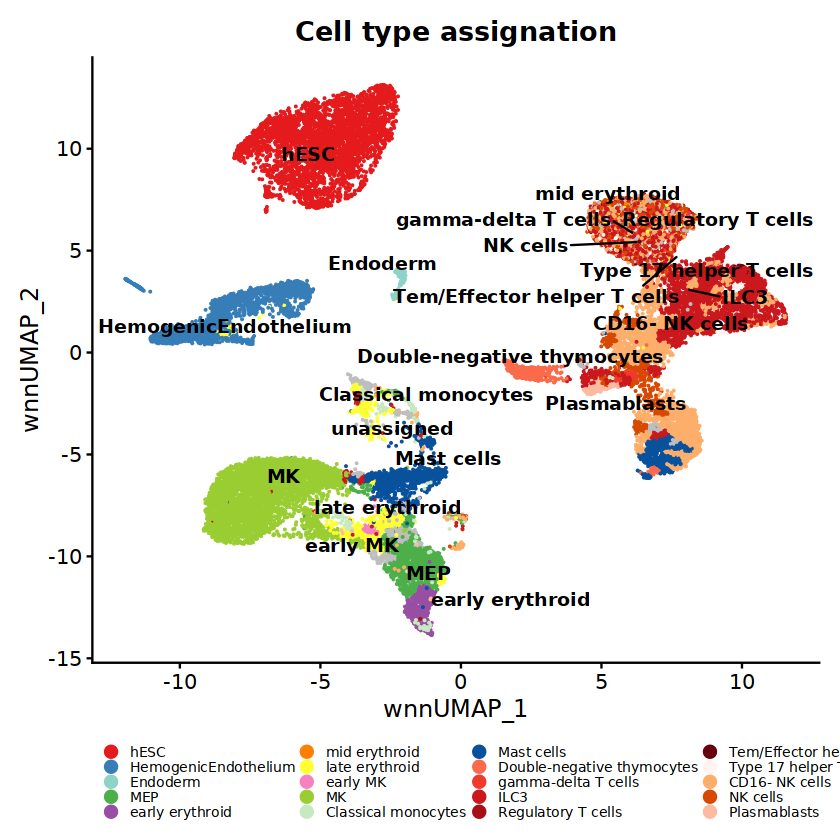

In [617]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Construction_annotation", label = FALSE, cols=vector_colors) 

p3<-LabelClusters(p3, id = "Construction_annotation",  fontface = "bold", color = "black")+
ggtitle("Cell type assignation")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))

p3


In [618]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_Construction_annotation_FINAL_after_MJ.png', width=750, height=750)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

## Dotplot

In [619]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

png 
  2

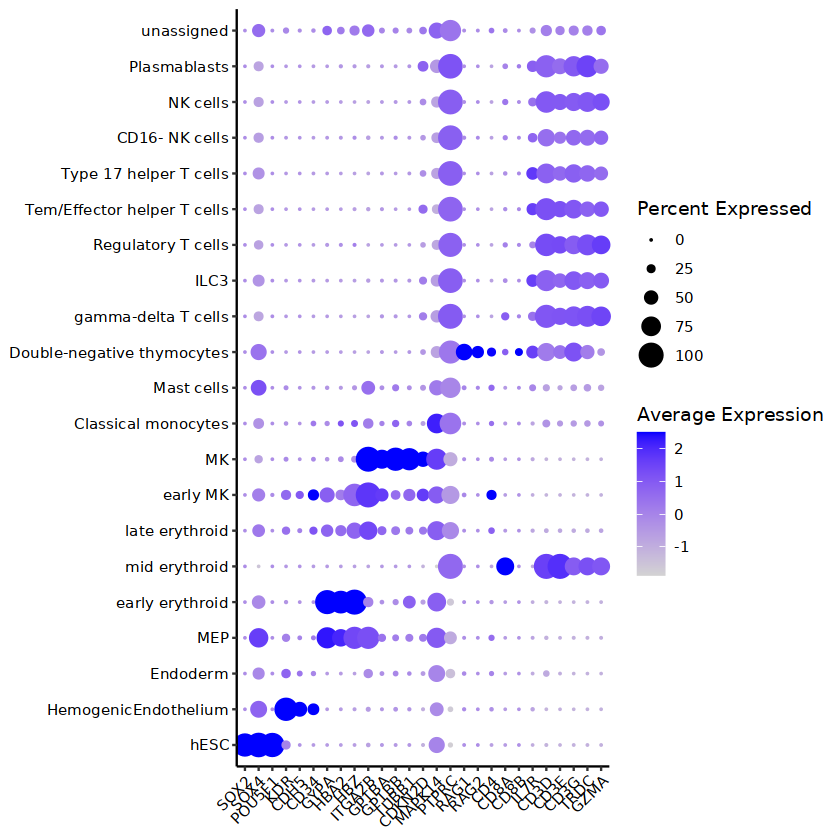

In [620]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation_FINAL_after_MJ.png', width =1000)
dotplot3
dev.off()

# Dotplot new markers

In [621]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

In [ ]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation_NEW_MARKERS_after_MJ.png', width =1000)
dotplot3
dev.off()

png 
  2